In [148]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import math

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [149]:
cop = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Airbnb listings in Copenhagen (June 2016).csv',
                   encoding='utf8')

In [150]:
#cop.head(2)

In [151]:
cop.drop('borough', axis=1, inplace=True)

In [152]:
cop.neighborhood.replace(u'N\ufffdrrebro',u'Norrebro',inplace=True)
cop.neighborhood.replace(u'\ufffdsterbro',u'Osterbro',inplace=True)
cop.neighborhood.replace(u'Amager \ufffdst',u'Amager East',inplace=True)
cop.neighborhood.replace(u'Br\ufffdnsh\ufffdj-Husum',u'Bronshoj-Husum',inplace=True)
cop.neighborhood.replace(u'Vanl\ufffdse',u'Vanlose',inplace=True)

In [153]:
cop = cop[cop['room_type'].notnull()]

In [154]:
cop = cop.reset_index()

In [155]:
cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14588 entries, 0 to 14587
Data columns (total 16 columns):
index                   14588 non-null int64
Unnamed: 0              14588 non-null int64
room_id                 14588 non-null int64
host_id                 14588 non-null int64
room_type               14588 non-null object
neighborhood            14588 non-null object
reviews                 14588 non-null int64
overall_satisfaction    7992 non-null float64
accommodates            14588 non-null int64
bedrooms                14571 non-null float64
bathrooms               13673 non-null float64
price                   14588 non-null float64
minstay                 14426 non-null float64
latitude                14588 non-null float64
longitude               14588 non-null float64
collected               14588 non-null object
dtypes: float64(7), int64(6), object(3)
memory usage: 1.8+ MB


In [156]:
cop.bedrooms.isnull().sum()

17

In [157]:
cop= cop[cop['bedrooms'].notnull()]

In [158]:
cop.bathrooms[cop.bathrooms==0].value_counts()

0.0    21
Name: bathrooms, dtype: int64

In [159]:
# We have removed the rows that had "0" bathrooms. We are assuming every house comes with atleast 1 bathroom.
cop = cop[cop['bathrooms'] != 0.]

In [160]:
cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14550 entries, 0 to 14587
Data columns (total 16 columns):
index                   14550 non-null int64
Unnamed: 0              14550 non-null int64
room_id                 14550 non-null int64
host_id                 14550 non-null int64
room_type               14550 non-null object
neighborhood            14550 non-null object
reviews                 14550 non-null int64
overall_satisfaction    7970 non-null float64
accommodates            14550 non-null int64
bedrooms                14550 non-null float64
bathrooms               13636 non-null float64
price                   14550 non-null float64
minstay                 14388 non-null float64
latitude                14550 non-null float64
longitude               14550 non-null float64
collected               14550 non-null object
dtypes: float64(7), int64(6), object(3)
memory usage: 1.9+ MB


In [161]:
co = cop[['bedrooms','bathrooms']]

In [162]:
co.sort_values('bedrooms', inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [163]:
co.head(2)

,bedrooms,bathrooms
7378,0.0,1.0
7930,0.0,1.0


In [164]:
cop.sort_values('bedrooms', inplace=True)

In [165]:
cop = cop.reset_index()

In [166]:
cop.head(2)

,level_0,index,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,7378,7379,7379,6830322,35781358,Entire home/apt,Osterbro,1,NaN,2,0.0,1.0,39.0,1.0,55.694789,12.569203,2016-06-04 08:52:54.513456
1,7930,7931,7931,7096528,37197402,Entire home/apt,Valby,0,NaN,2,0.0,1.0,62.0,1.0,55.671845,12.487983,2016-06-04 08:30:38.003941


In [167]:
cop.drop(['index','Unnamed: 0'], axis=1, inplace=True)

In [168]:
cop.head(2)

,level_0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,7378,6830322,35781358,Entire home/apt,Osterbro,1,NaN,2,0.0,1.0,39.0,1.0,55.694789,12.569203,2016-06-04 08:52:54.513456
1,7930,7096528,37197402,Entire home/apt,Valby,0,NaN,2,0.0,1.0,62.0,1.0,55.671845,12.487983,2016-06-04 08:30:38.003941


In [169]:
#cop['bathrooms'][cop['bedrooms']==3.]

In [170]:
# Imputation for Bathrooms
cop.bathrooms.fillna(method='bfill',inplace=True)


In [171]:
#cop.bathrooms[paris.bedrooms==3]

In [172]:
#cop

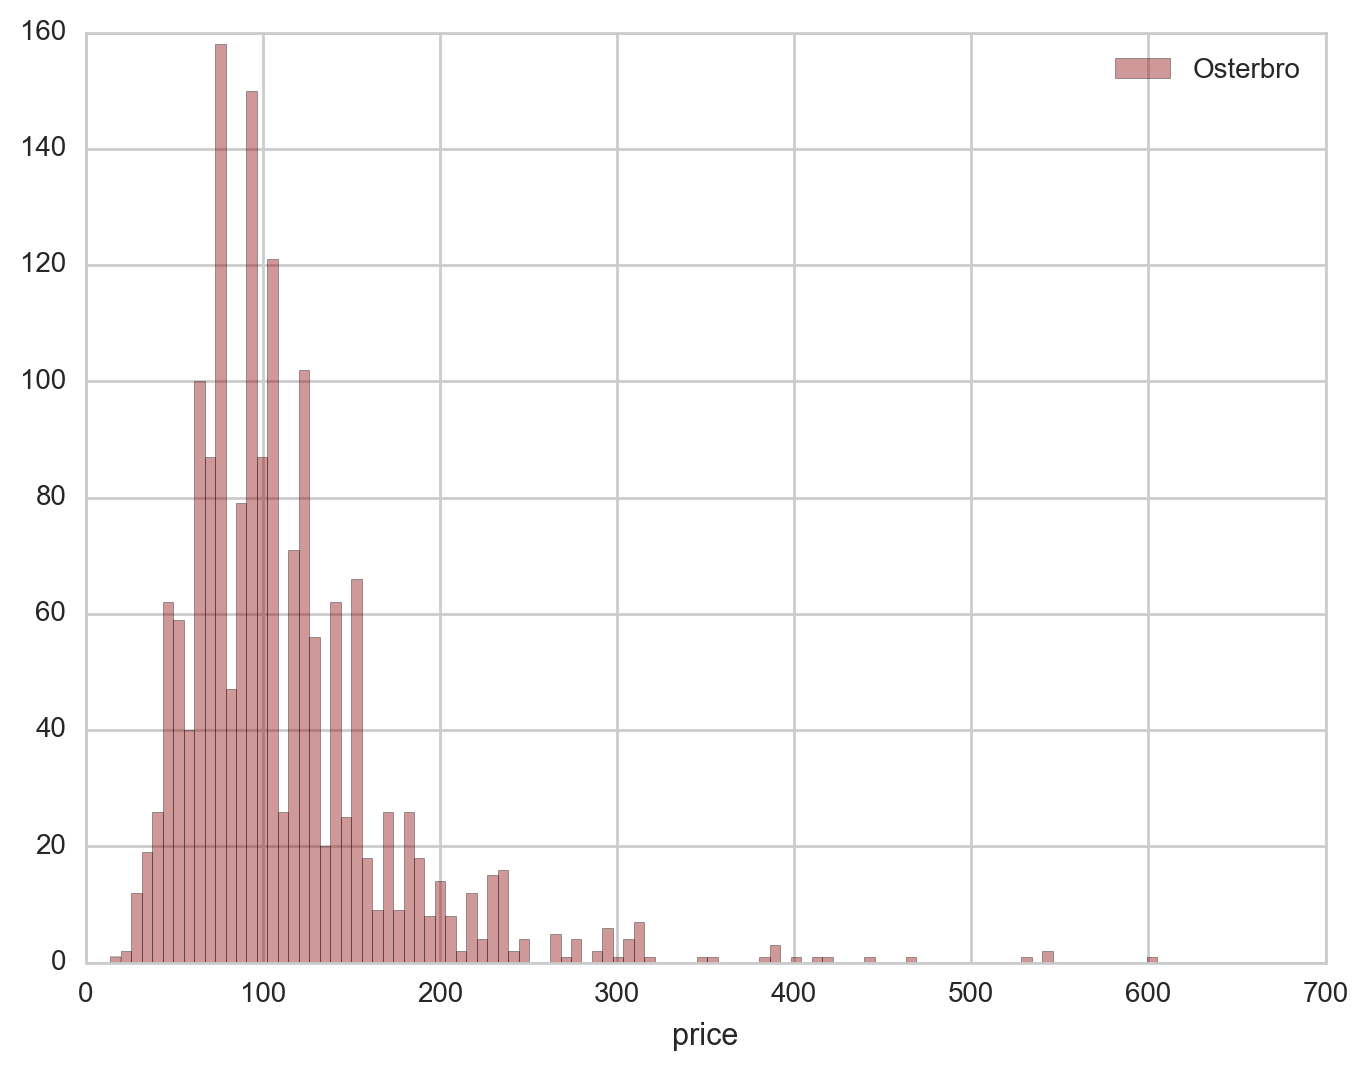

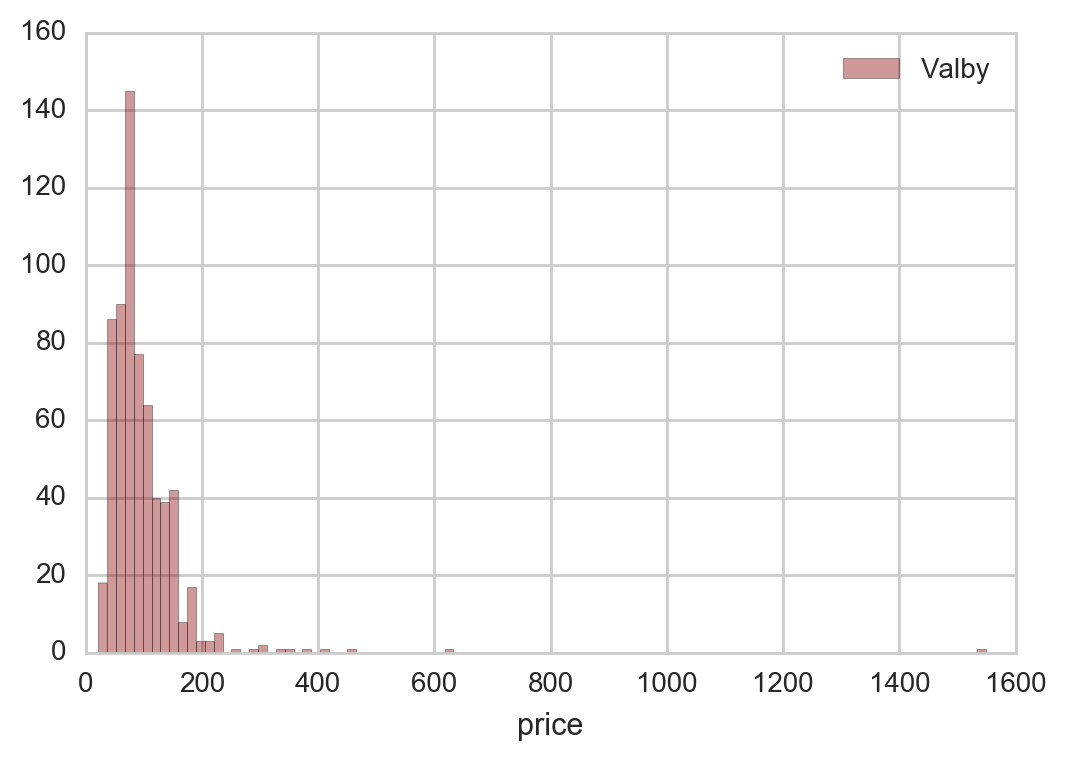

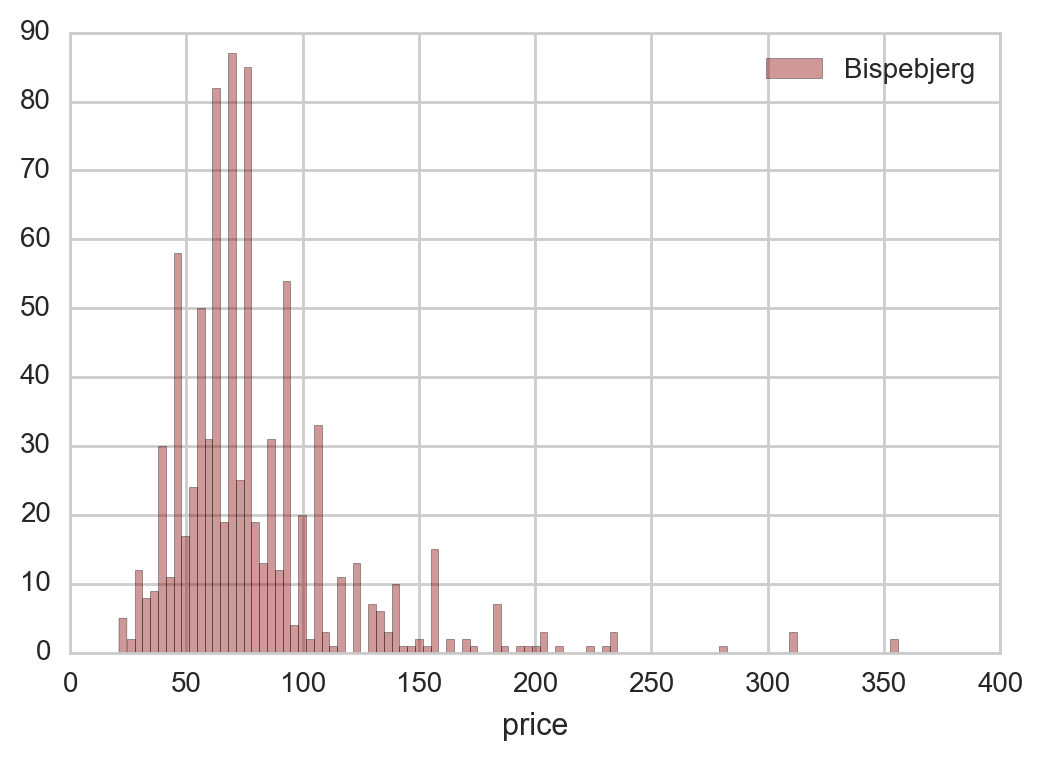

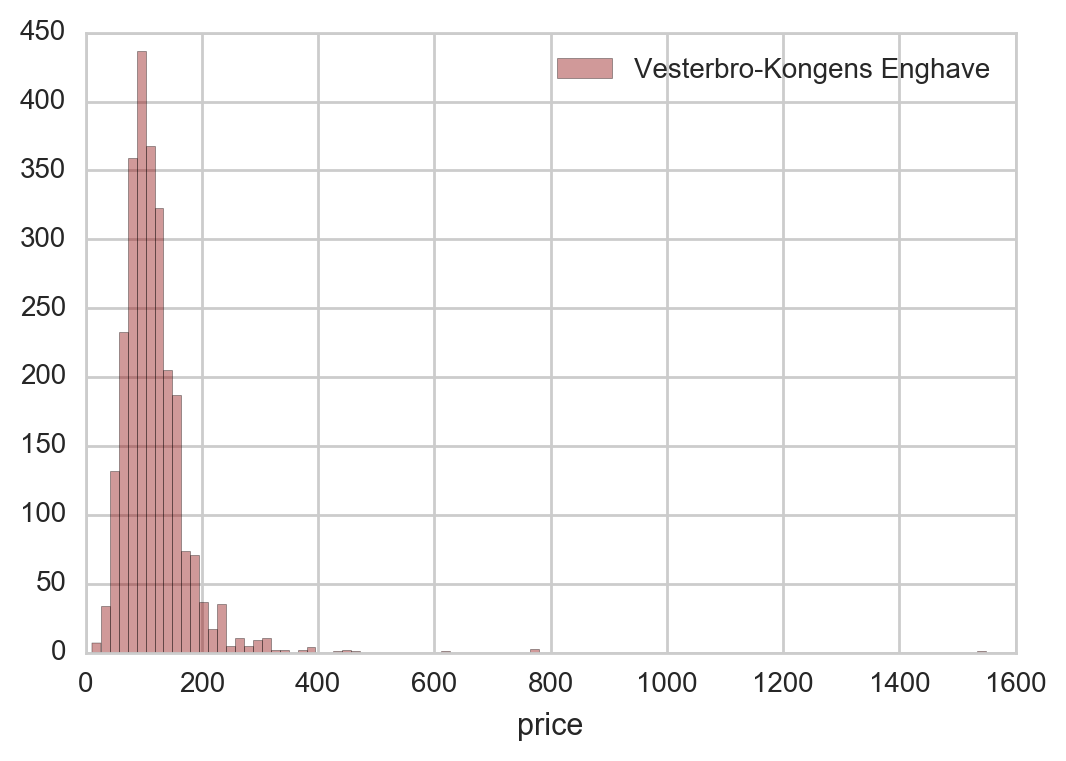

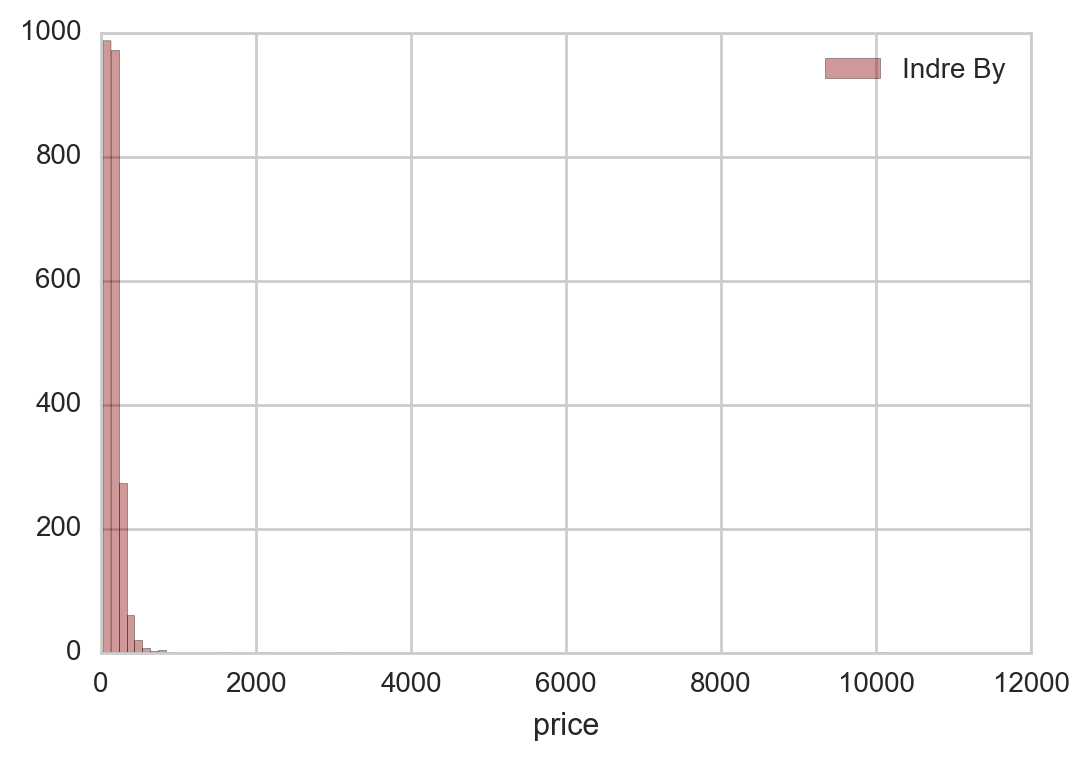

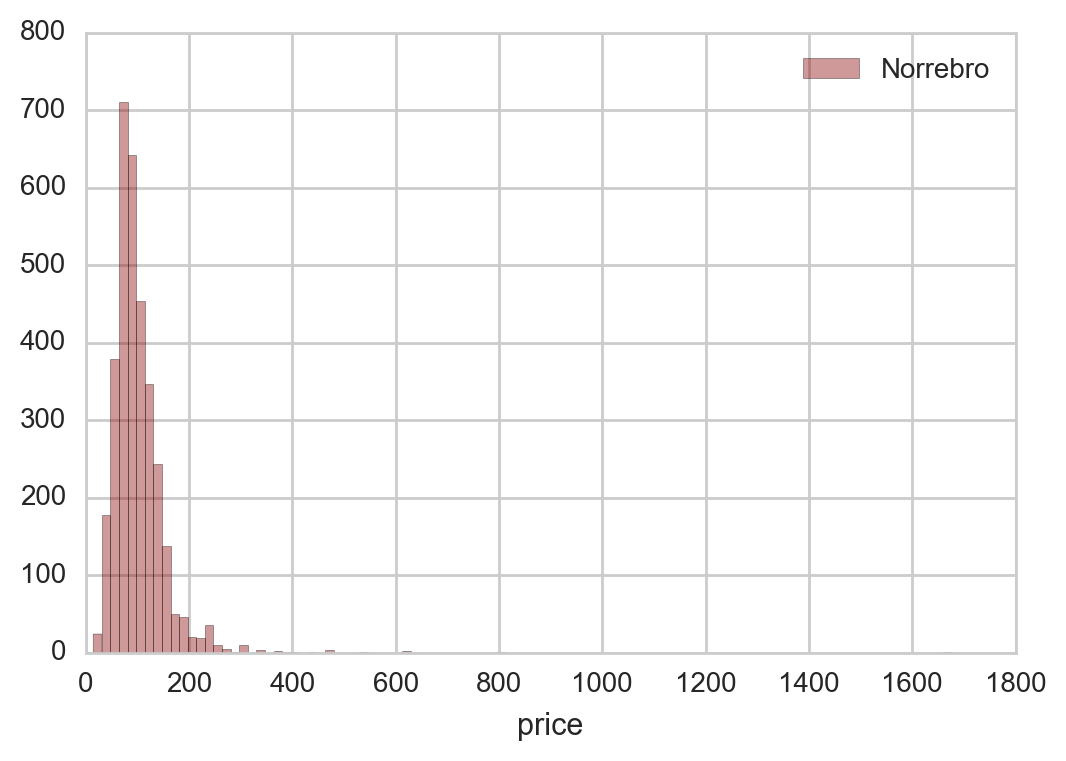

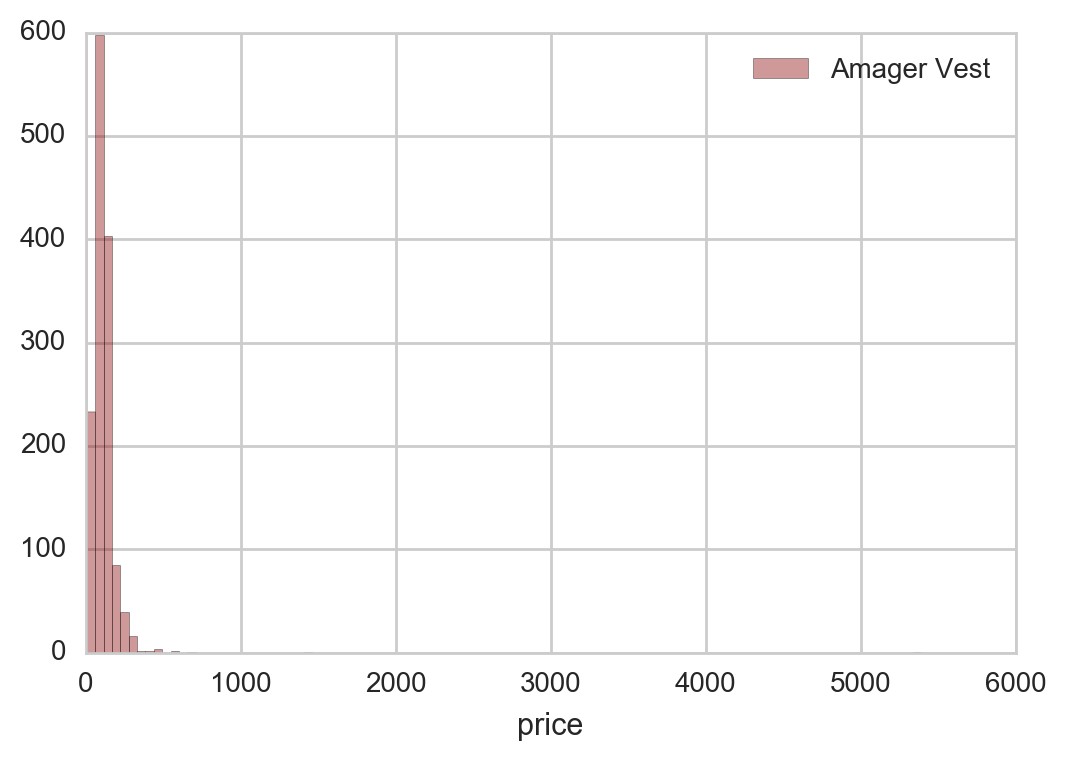

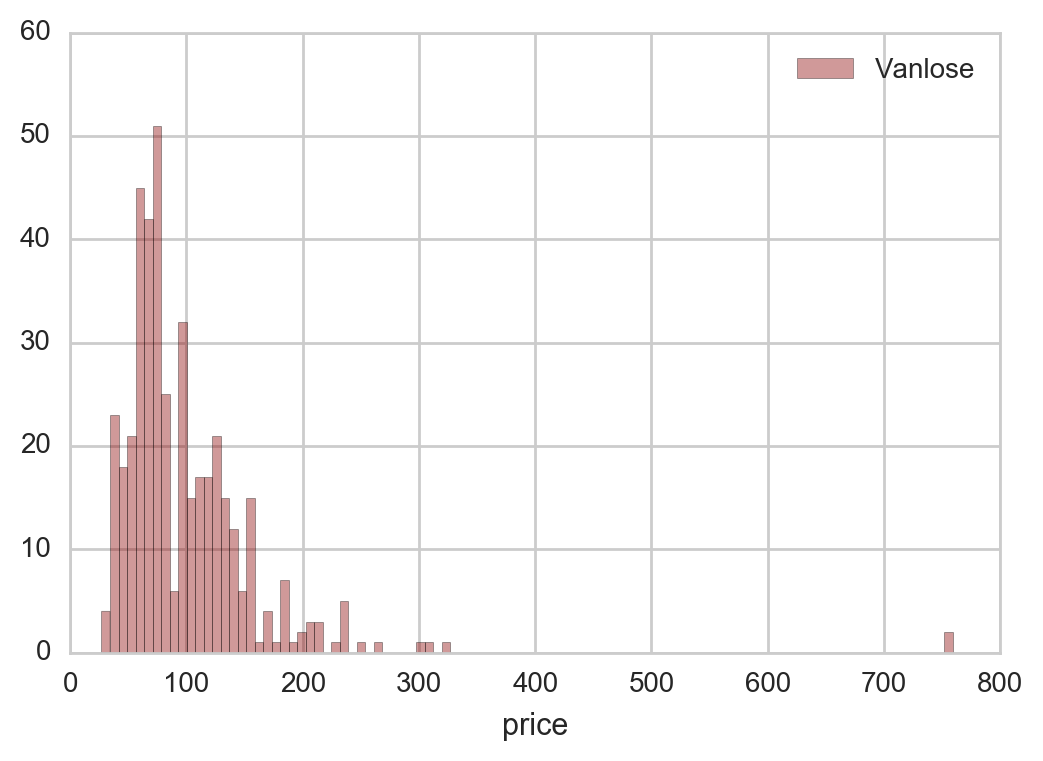

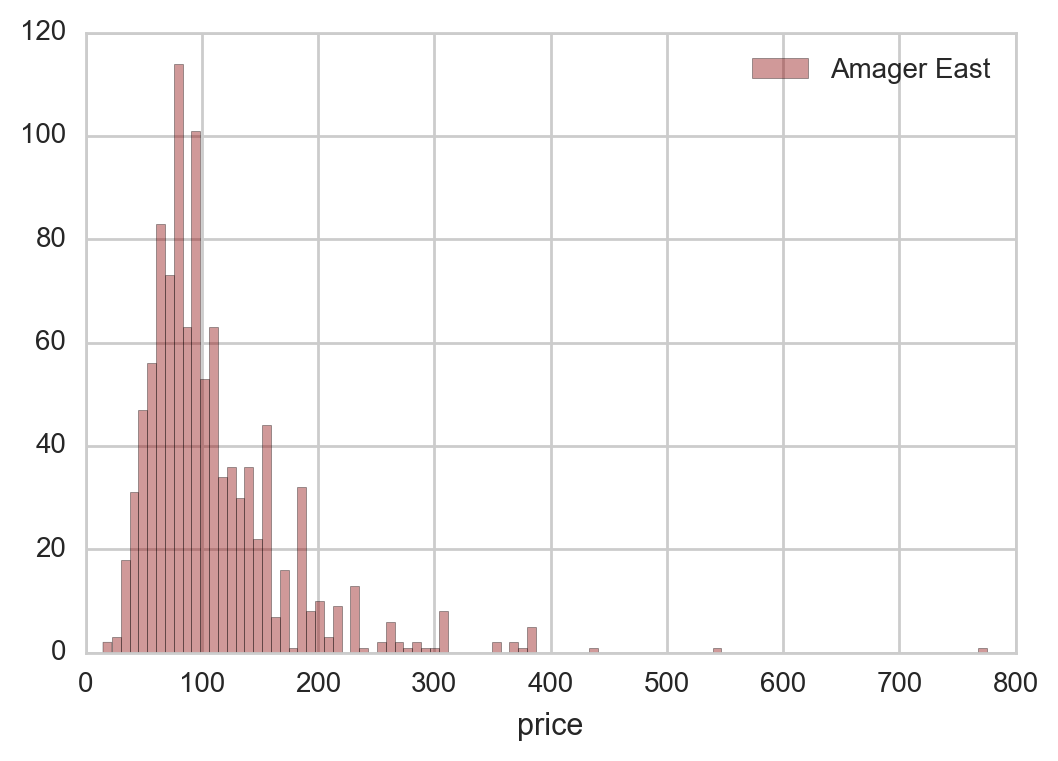

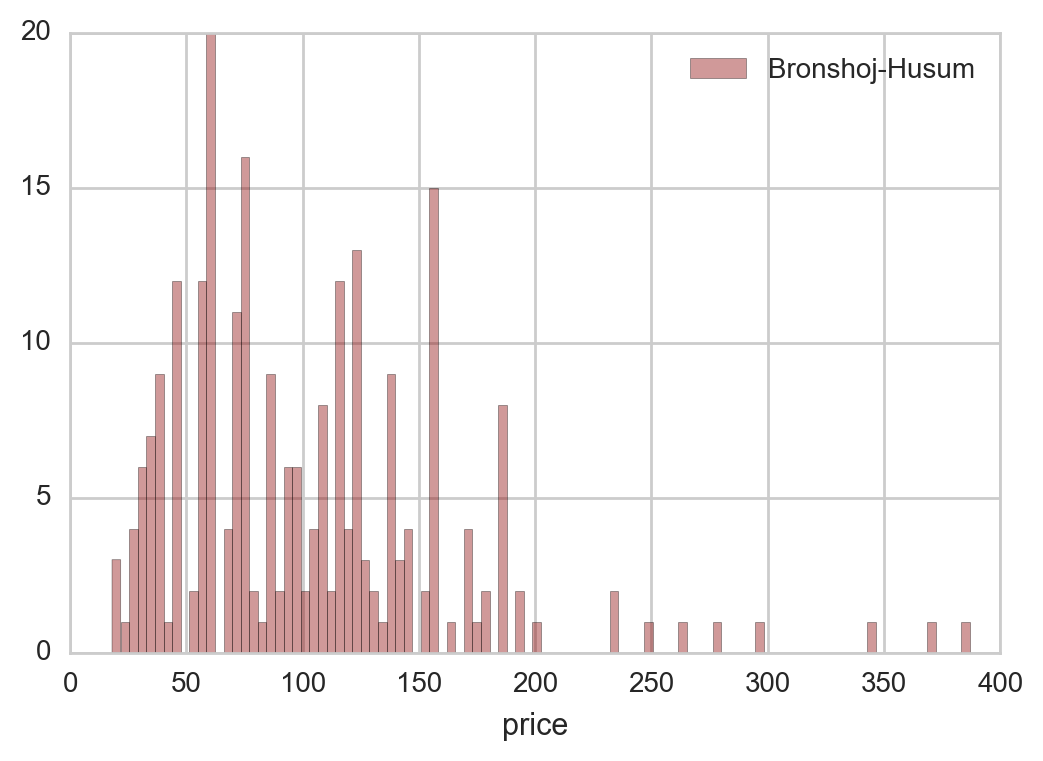

In [173]:
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(cop.neighborhood.unique())):
    co = cop[cop.neighborhood == cop.neighborhood.unique()[i]]
    
    ax = sns.distplot(co.price, color='darkred', bins=100, kde=False, 
                      label = cop.neighborhood.unique()[i])
                      
    ax.legend(loc='upper right')
    #ax.set_xlim([0, 1500])
    plt.show()

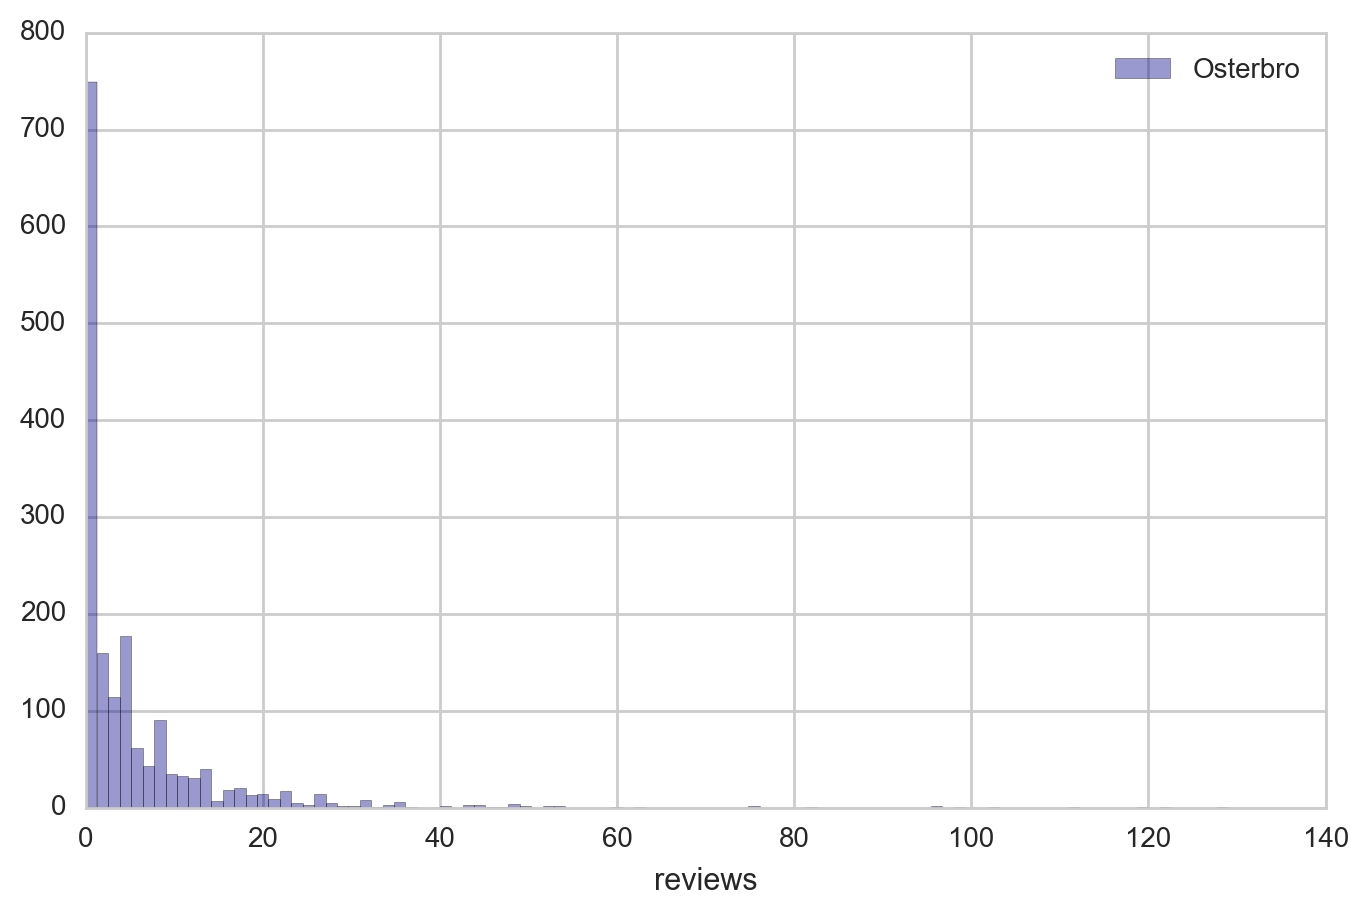

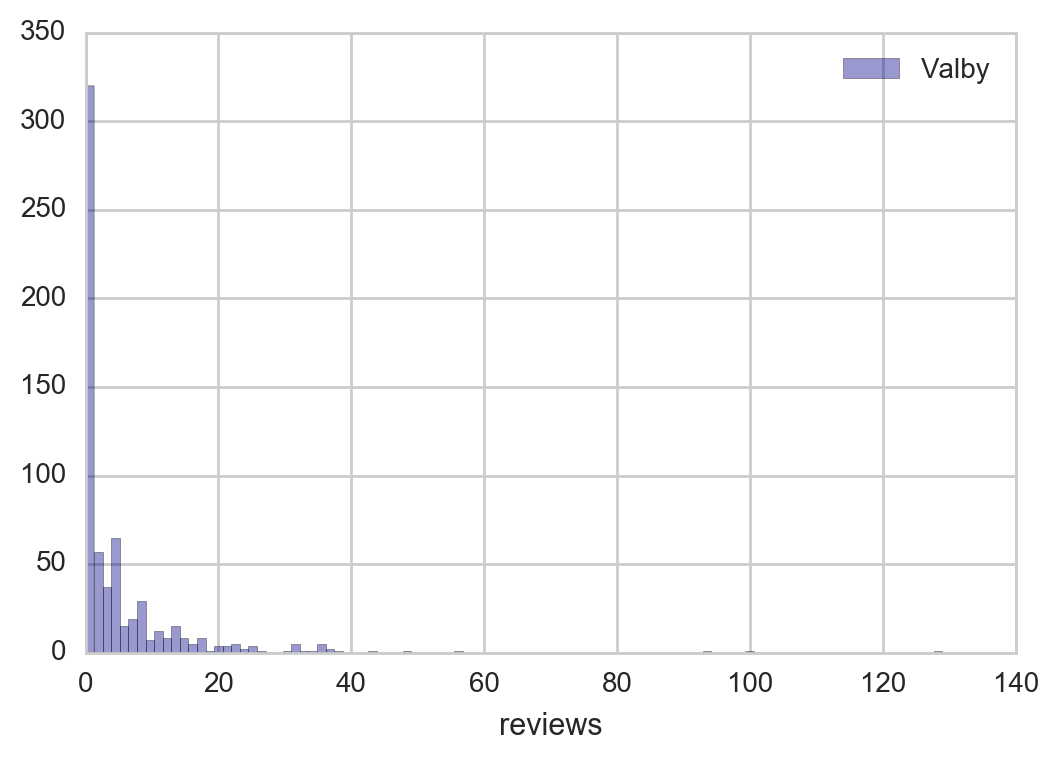

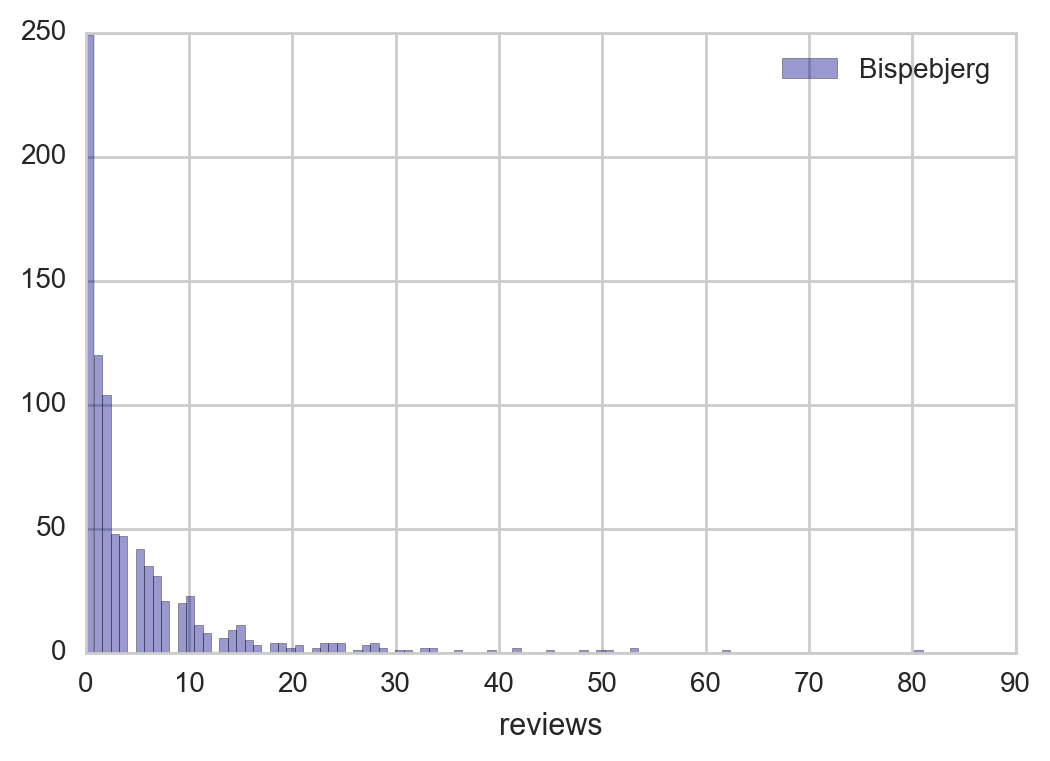

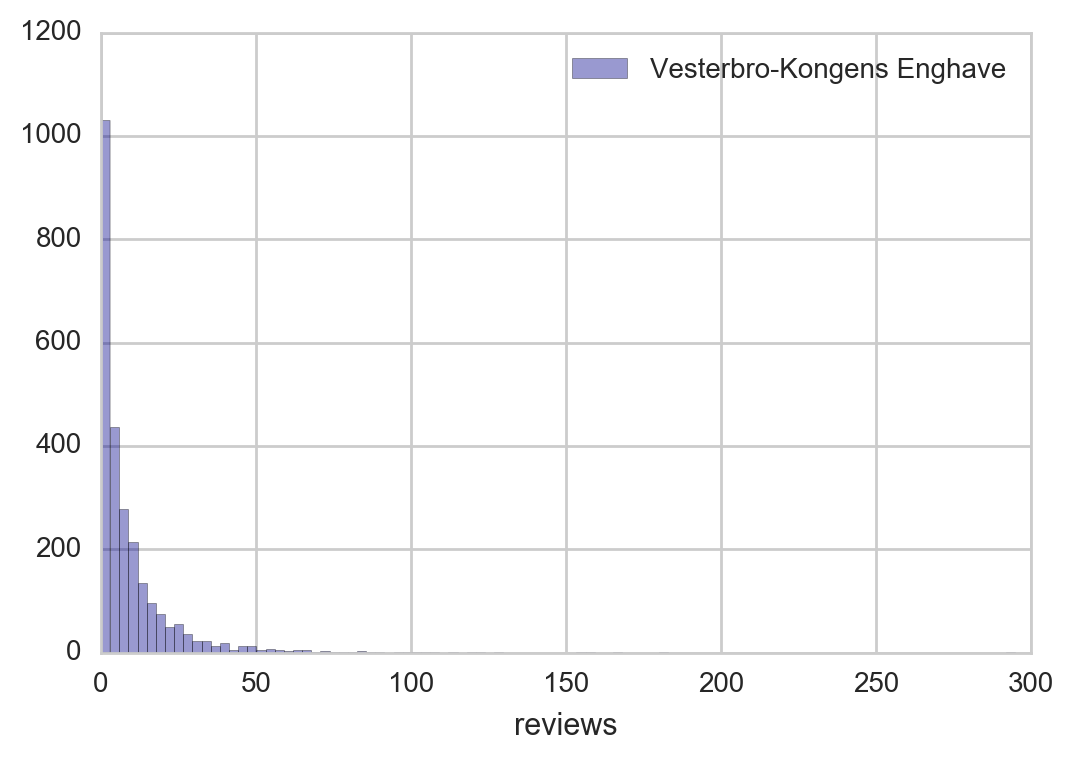

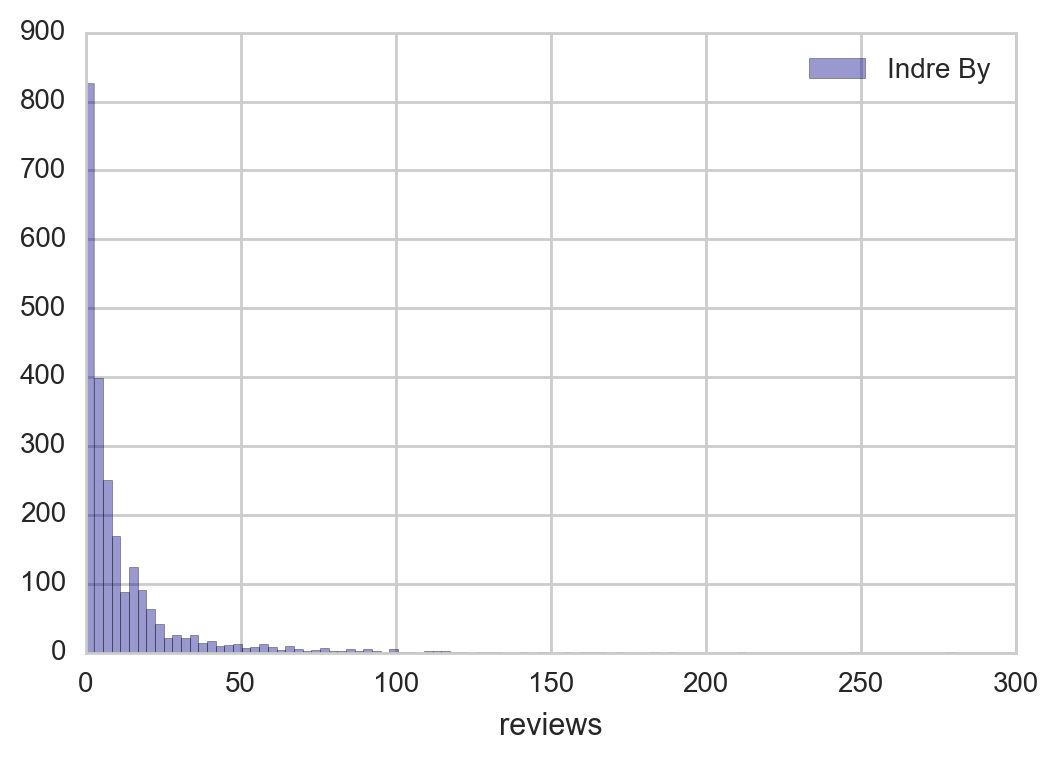

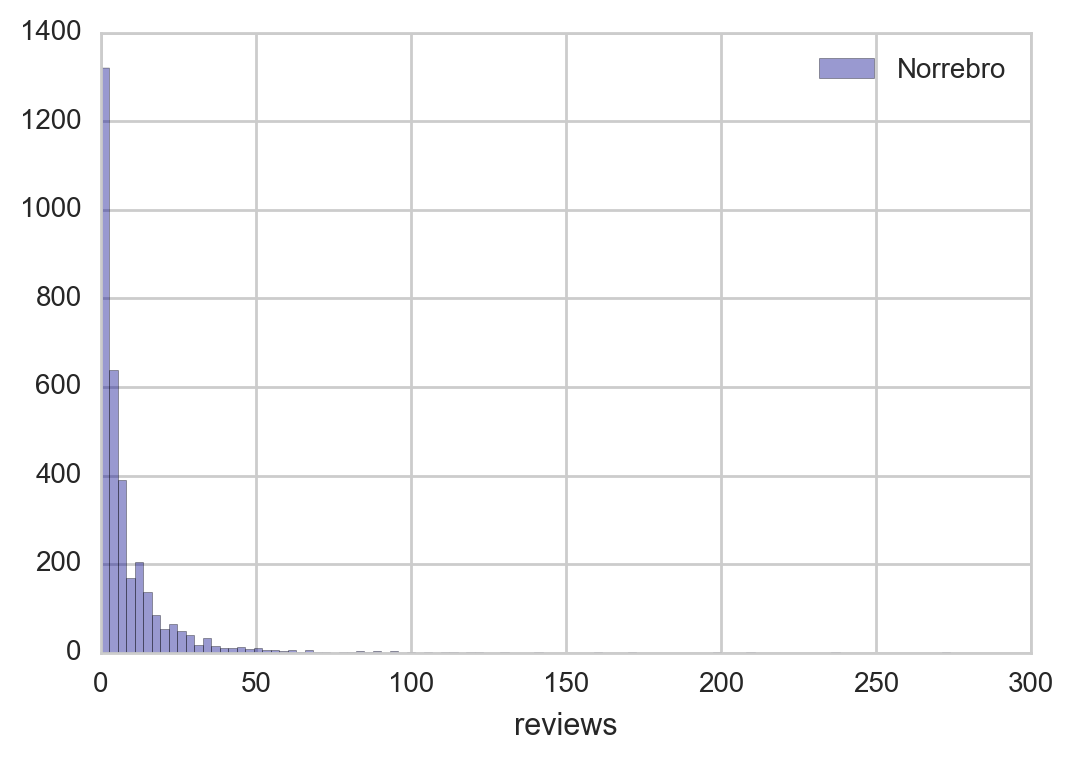

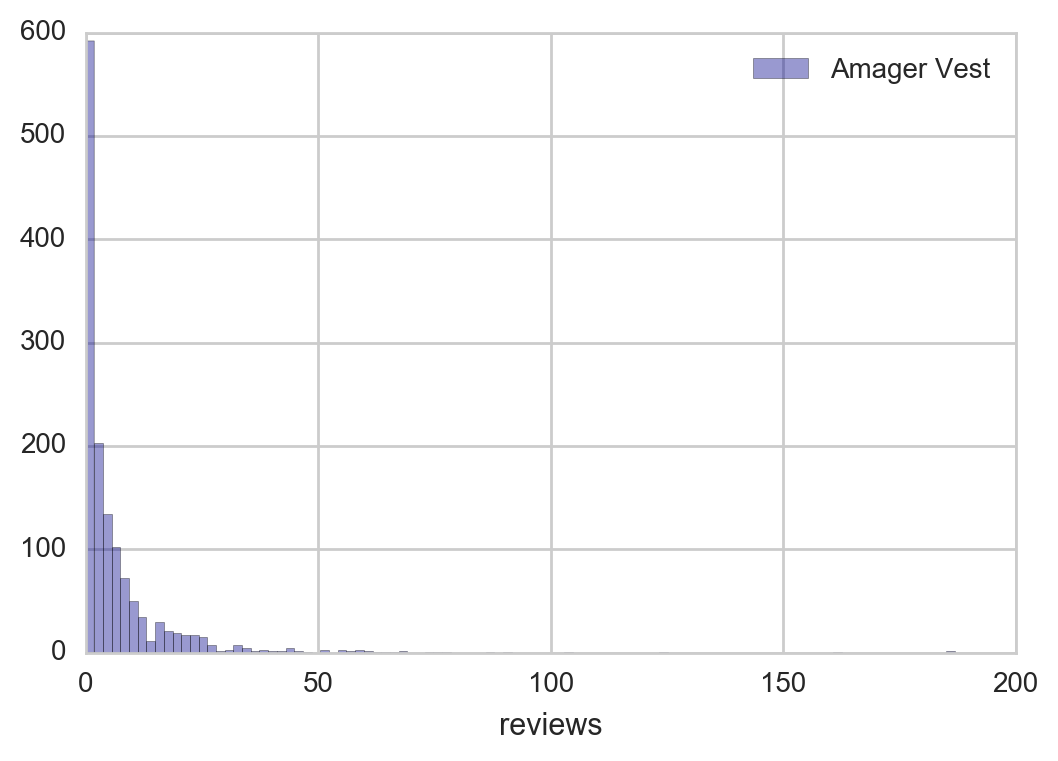

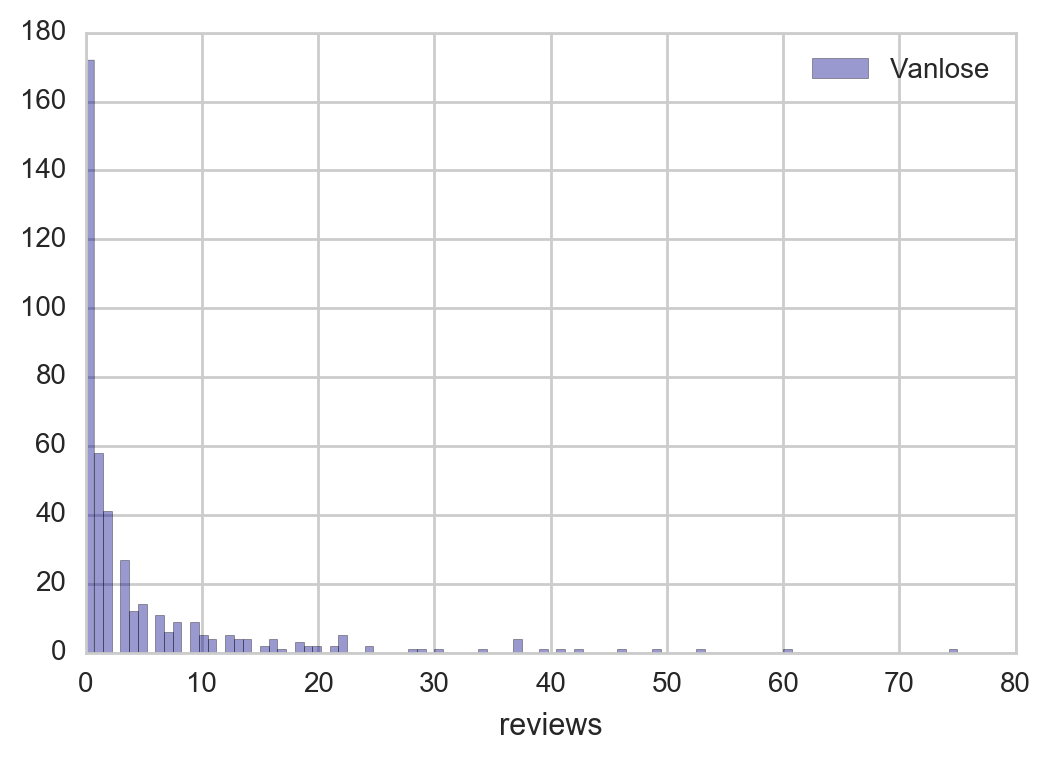

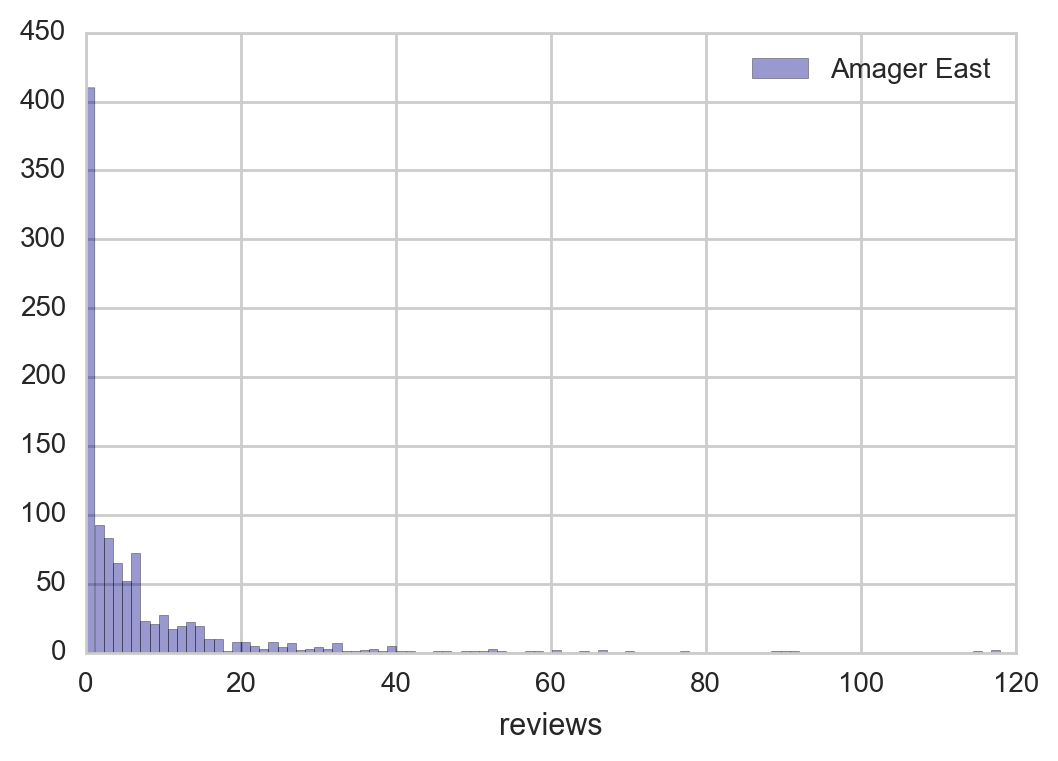

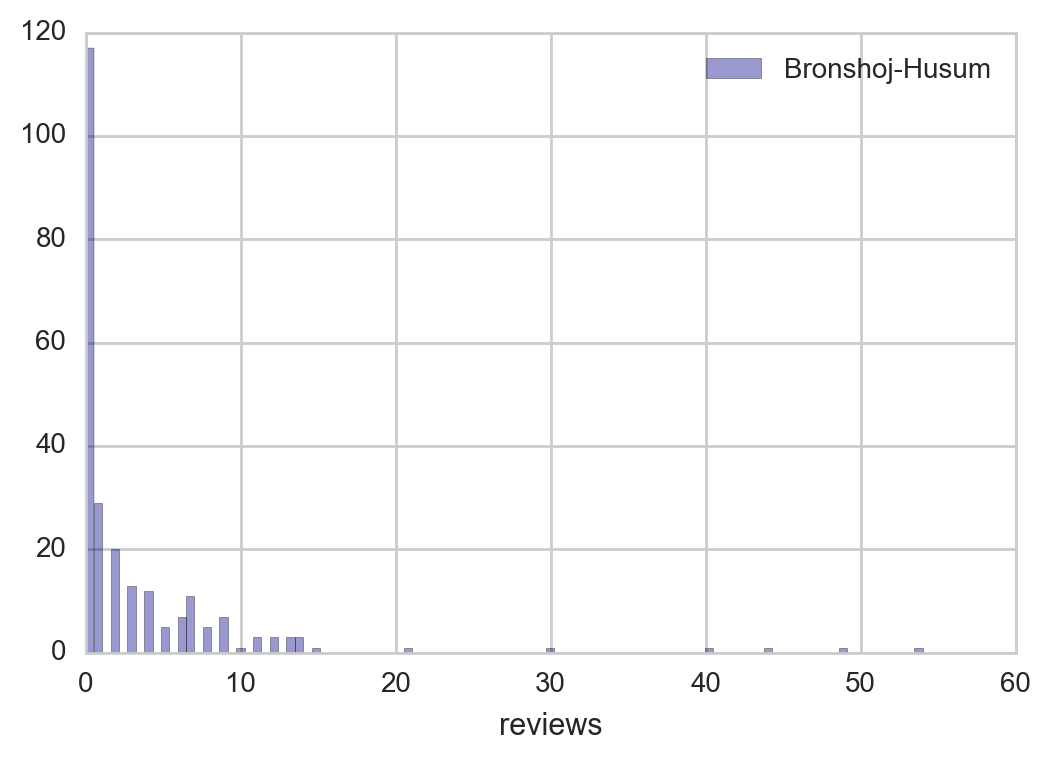

In [174]:
fig, ax = plt.subplots(figsize=(8,5))

for i in range(len(cop.neighborhood.unique())):
    co = cop[cop.neighborhood == cop.neighborhood.unique()[i]]
    
    ax = sns.distplot(co.reviews, color='darkblue', bins=100, kde=False, 
                      label = cop.neighborhood.unique()[i])
                      
    ax.legend(loc='upper right')
    #ax.set_xlim([0, 00])
    plt.show()

In [175]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(cop.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [176]:
df1=df1.reset_index()

In [177]:
df1.sort_values('neighborhood', inplace = True)

In [178]:
df1 = df1.reset_index()

In [179]:
df1.head(2)

,index,neighborhood,reviews,host_id,price
0,0,Amager East,7324,1045,107.703349
1,1,Amager Vest,9722,1387,120.322999


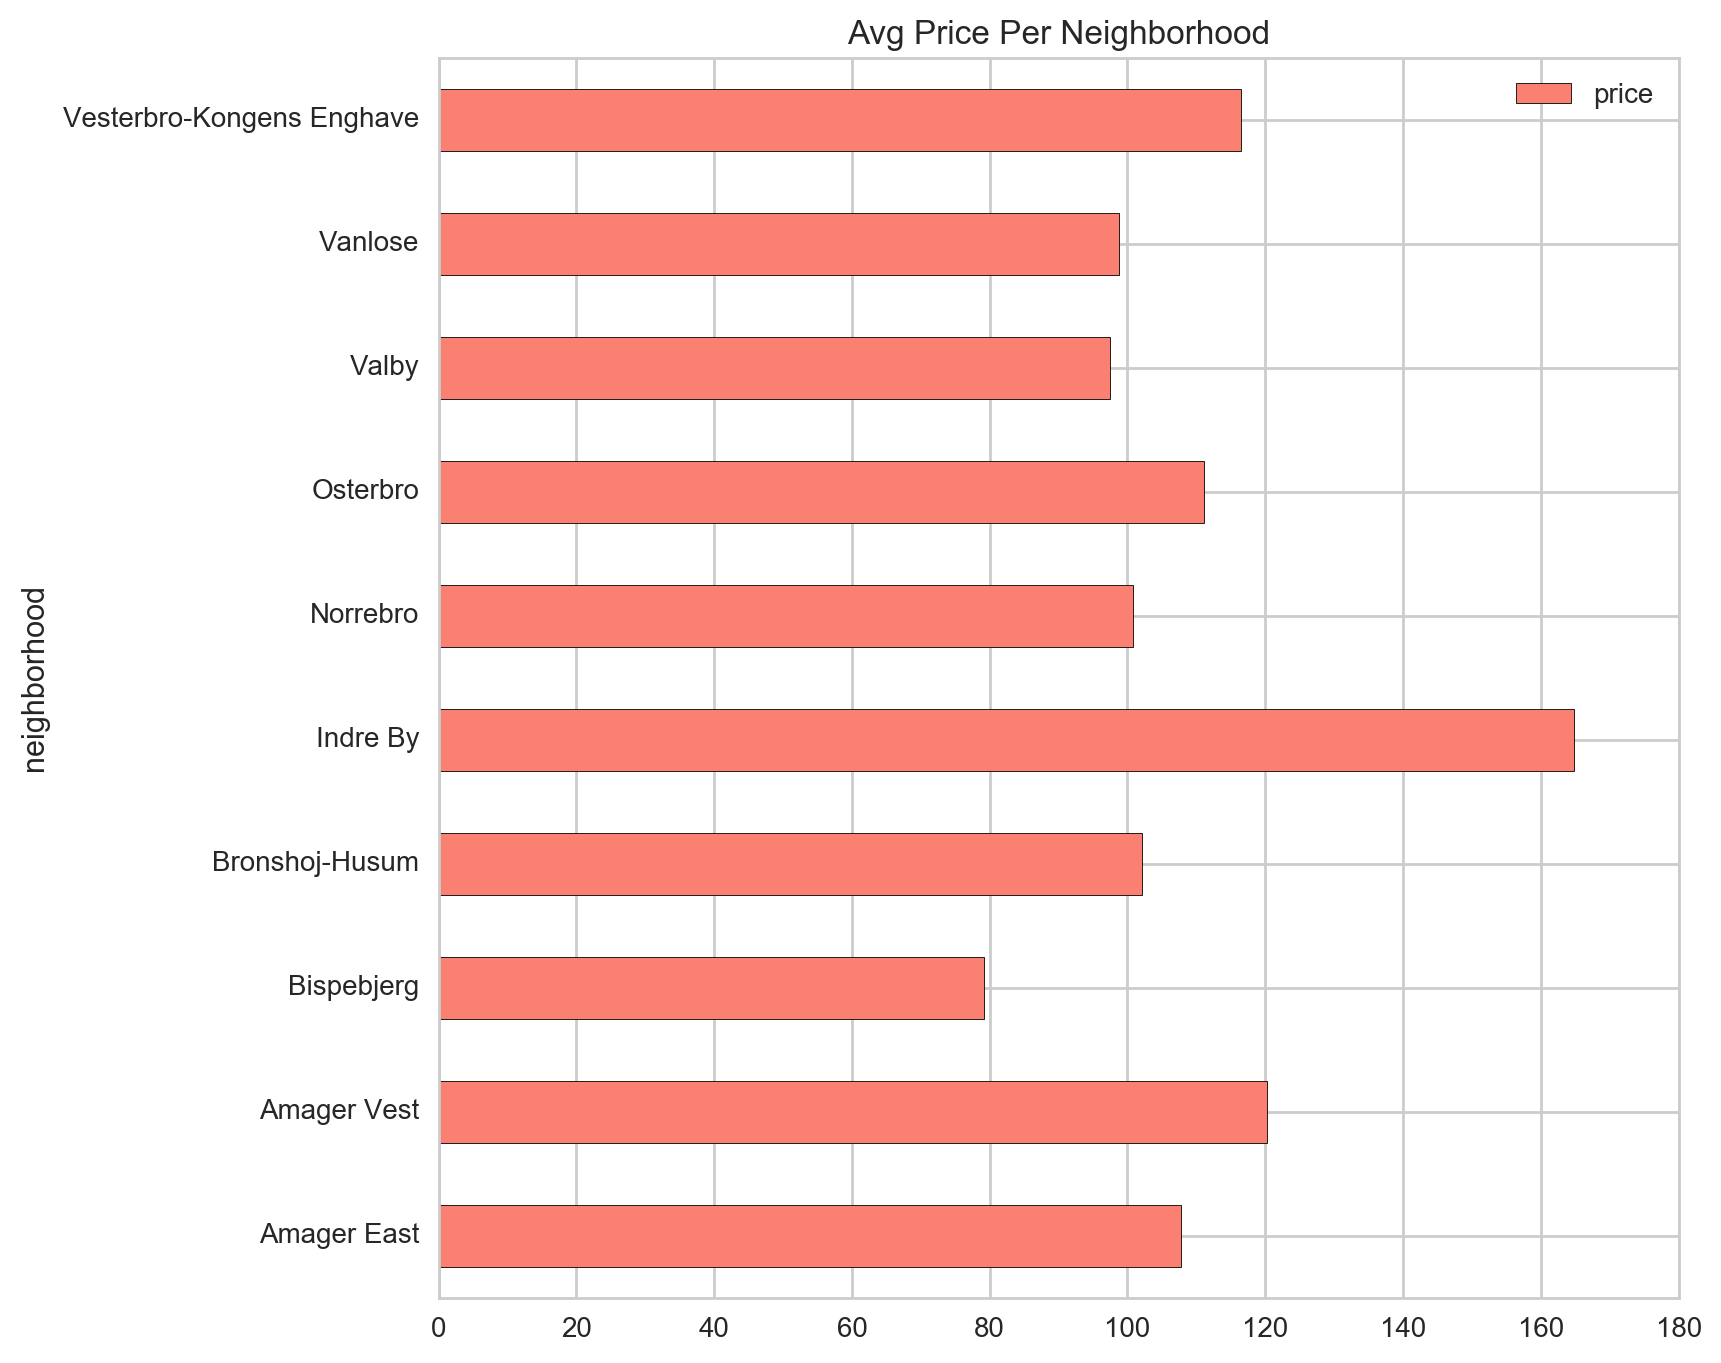

In [180]:
df1.plot(x='neighborhood', y='price', figsize=(8,8), kind = 'barh', title = 'Avg Price Per Neighborhood',
         color = 'salmon'
        )

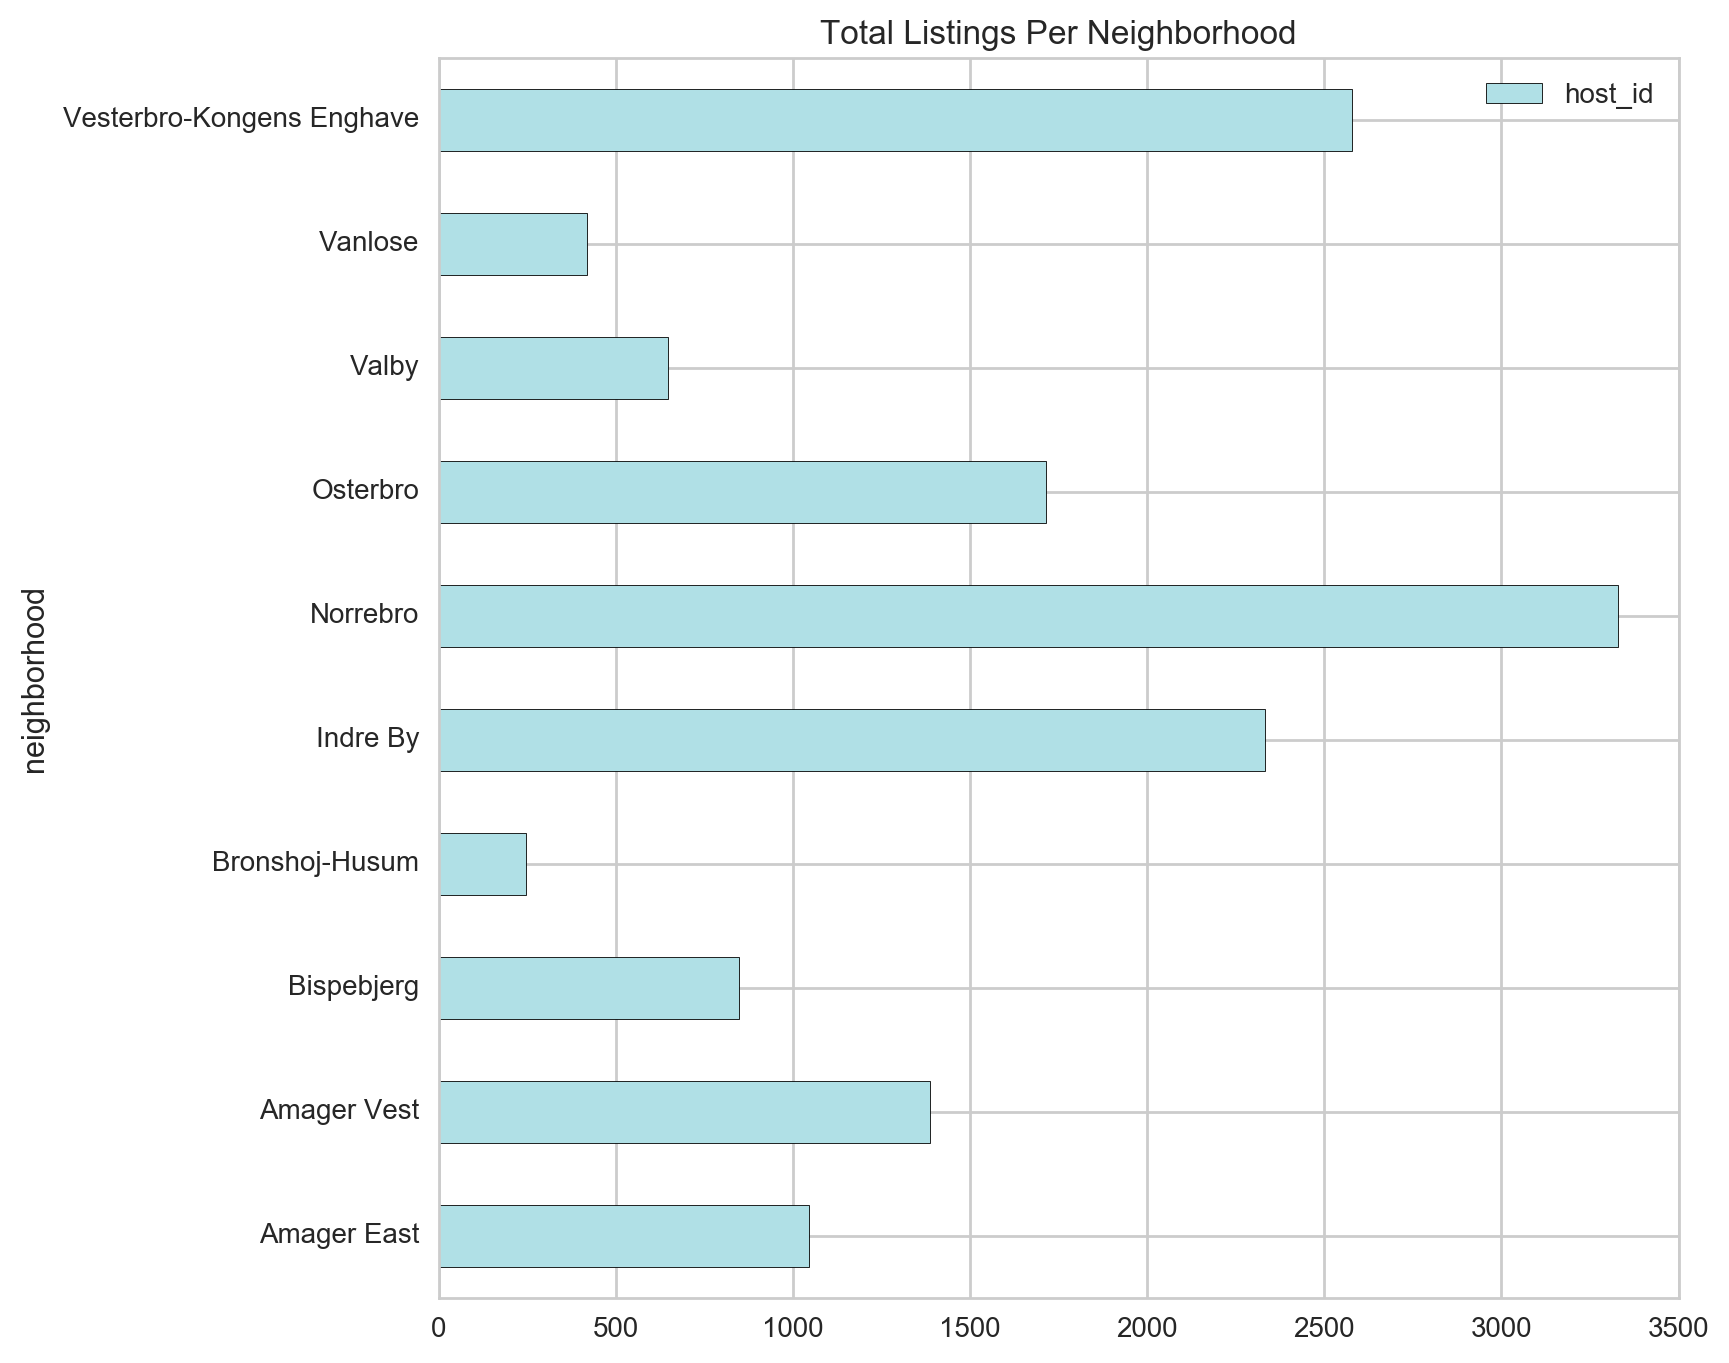

In [181]:
df1.plot(x='neighborhood', y='host_id', figsize=(8,8), kind = 'barh',title = 'Total Listings Per Neighborhood',
         color = 'powderblue')

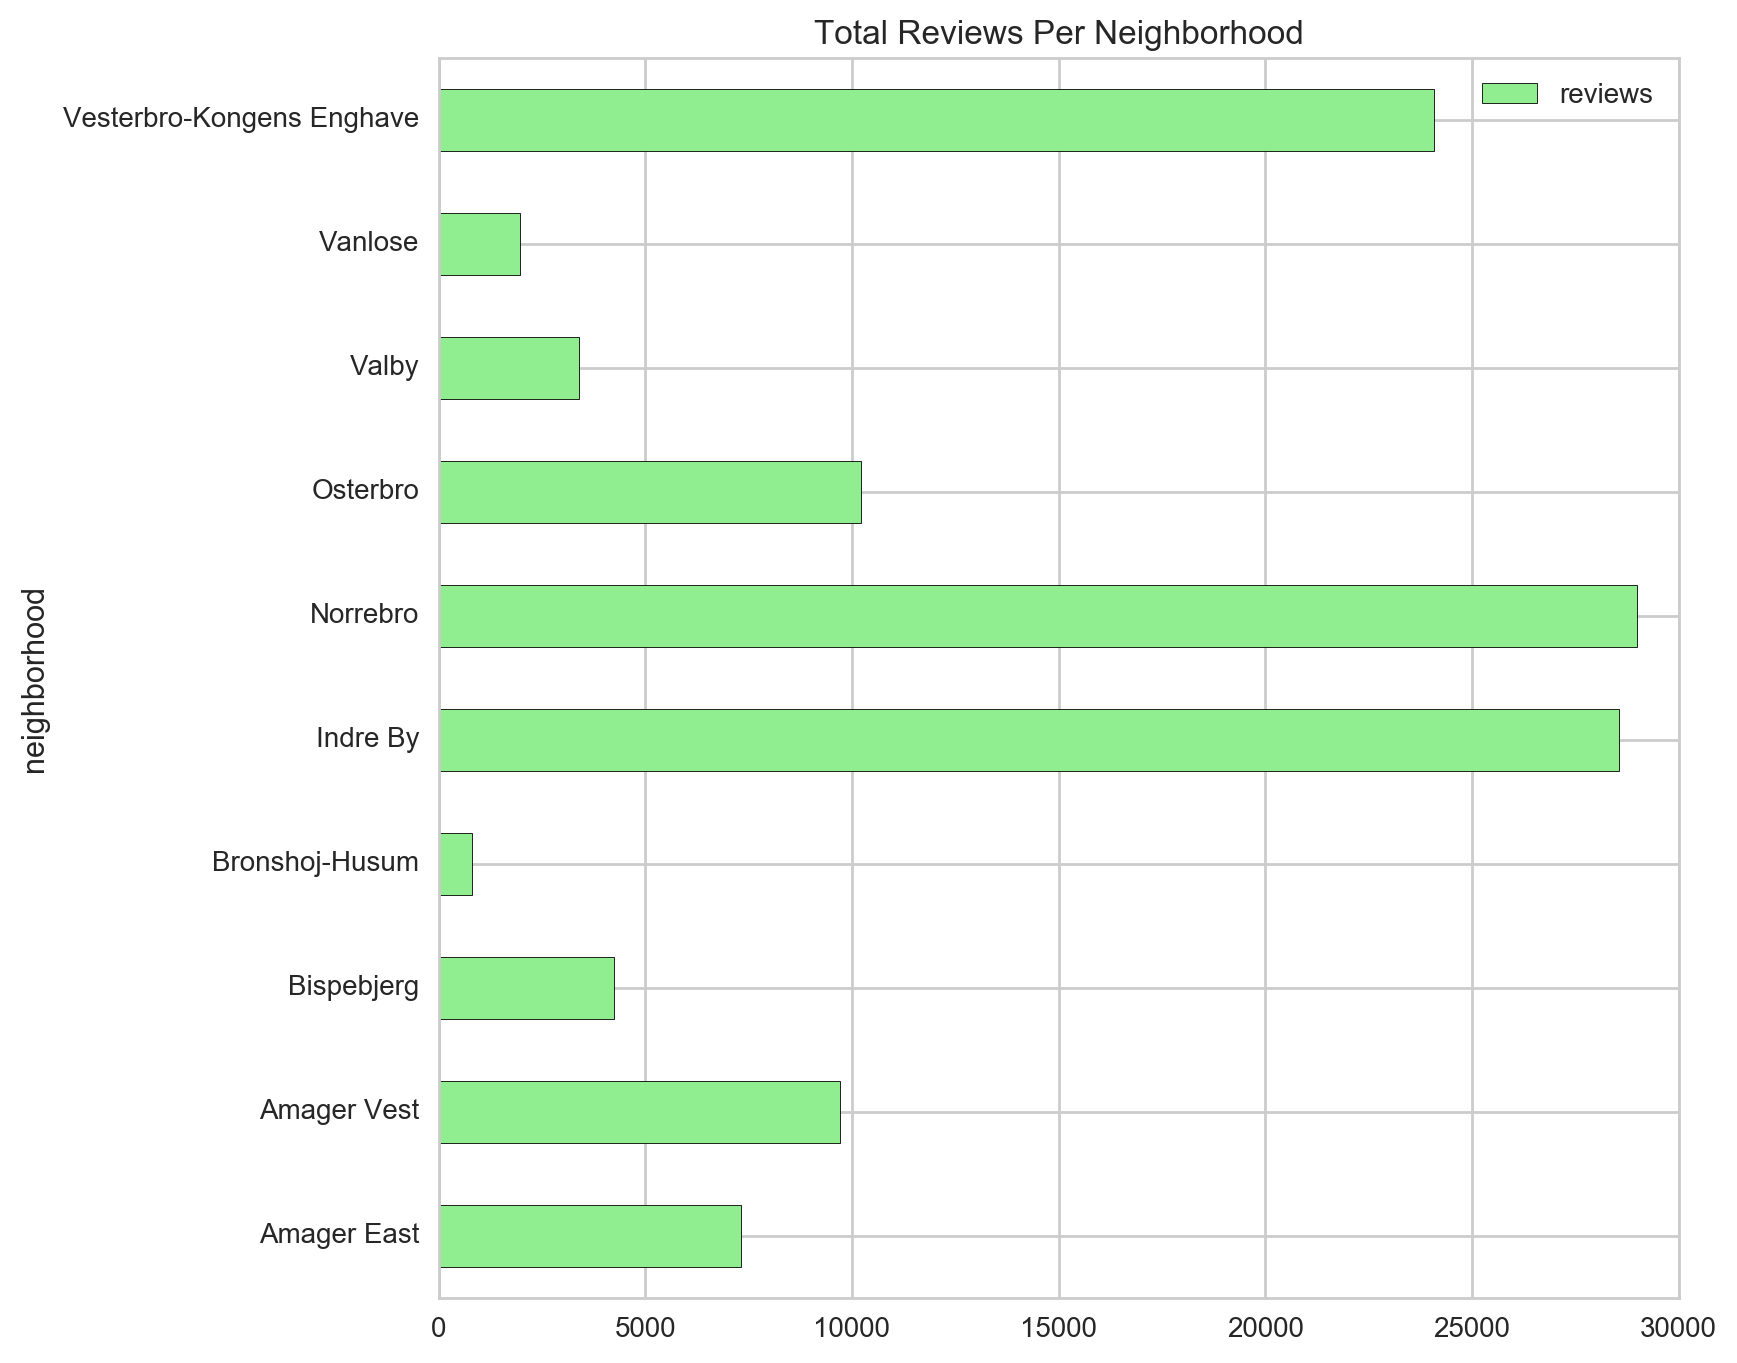

In [182]:
df1.plot(x='neighborhood', y='reviews', figsize=(8,8), kind = 'barh',title = 'Total Reviews Per Neighborhood',
        color='lightgreen')

In [183]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(cop.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [184]:
df2.reset_index(level=0, inplace=True)
df2.reset_index(inplace=True)

In [185]:
df2.head(2)

,room_type,neighborhood,reviews,host_id,price
0,Entire home/apt,Amager East,5055,866,118.102771
1,Private room,Amager East,2243,177,57.429379


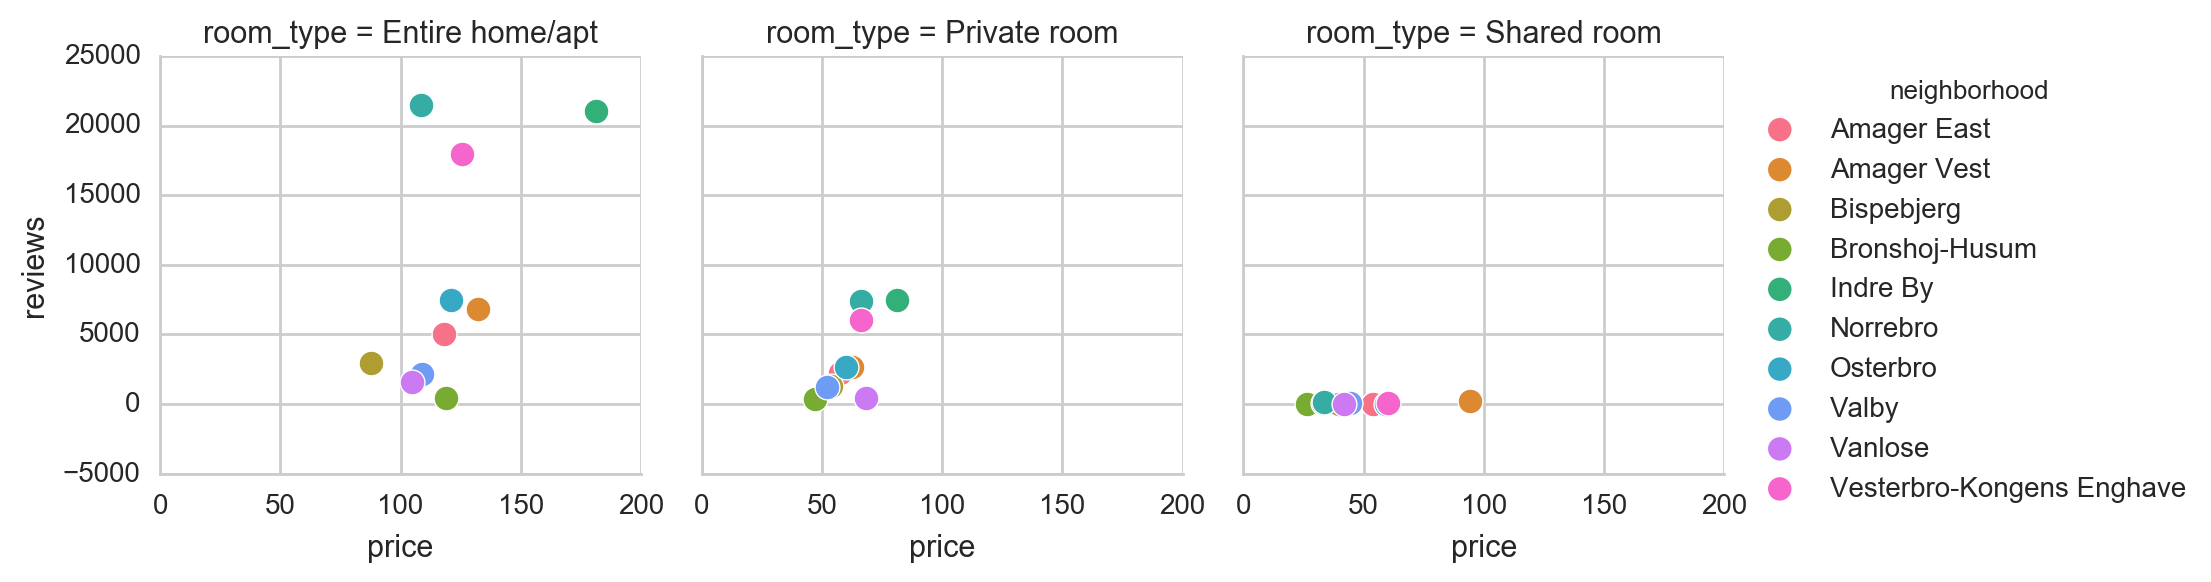

In [186]:
kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df2, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"price","reviews", edgecolor="w", **kws).add_legend())

In [187]:
custom = lambda x: np.average(x)
df3 = pd.DataFrame(cop.groupby(['neighborhood','room_type','bedrooms']).agg({'bedrooms':'count','price':custom}))

In [188]:
df3.rename(columns={'bedrooms':'bedroom_count'}, inplace=True)

In [189]:
df3.reset_index(inplace=True)

In [190]:
df3.head(2)

,neighborhood,room_type,bedrooms,price,bedroom_count
0,Amager East,Entire home/apt,0.0,73.333333,21
1,Amager East,Entire home/apt,1.0,89.551807,415


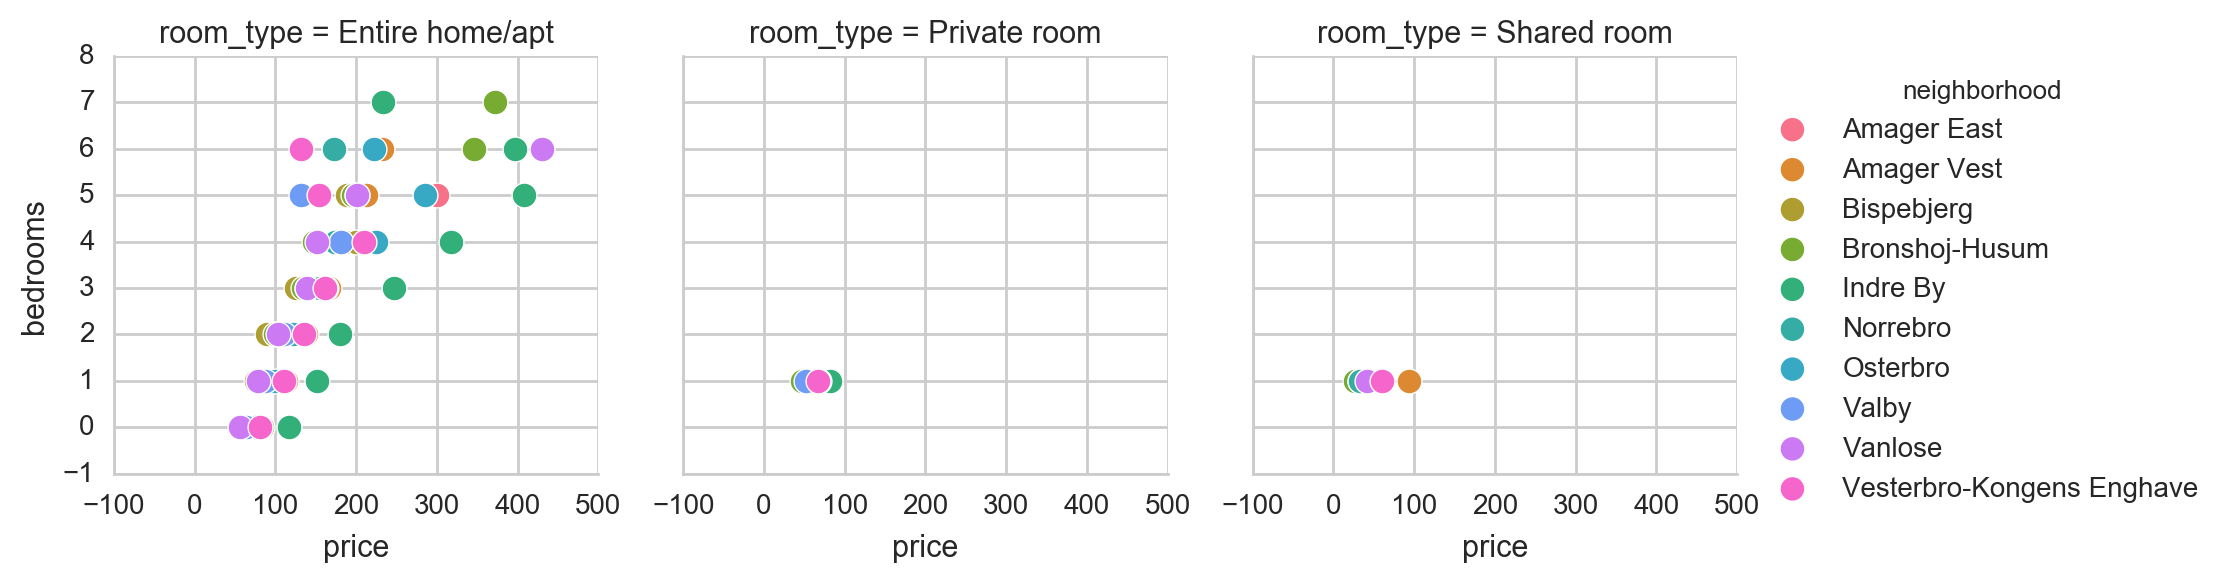

In [191]:
kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df3, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"price","bedrooms", edgecolor="w", **kws).add_legend())

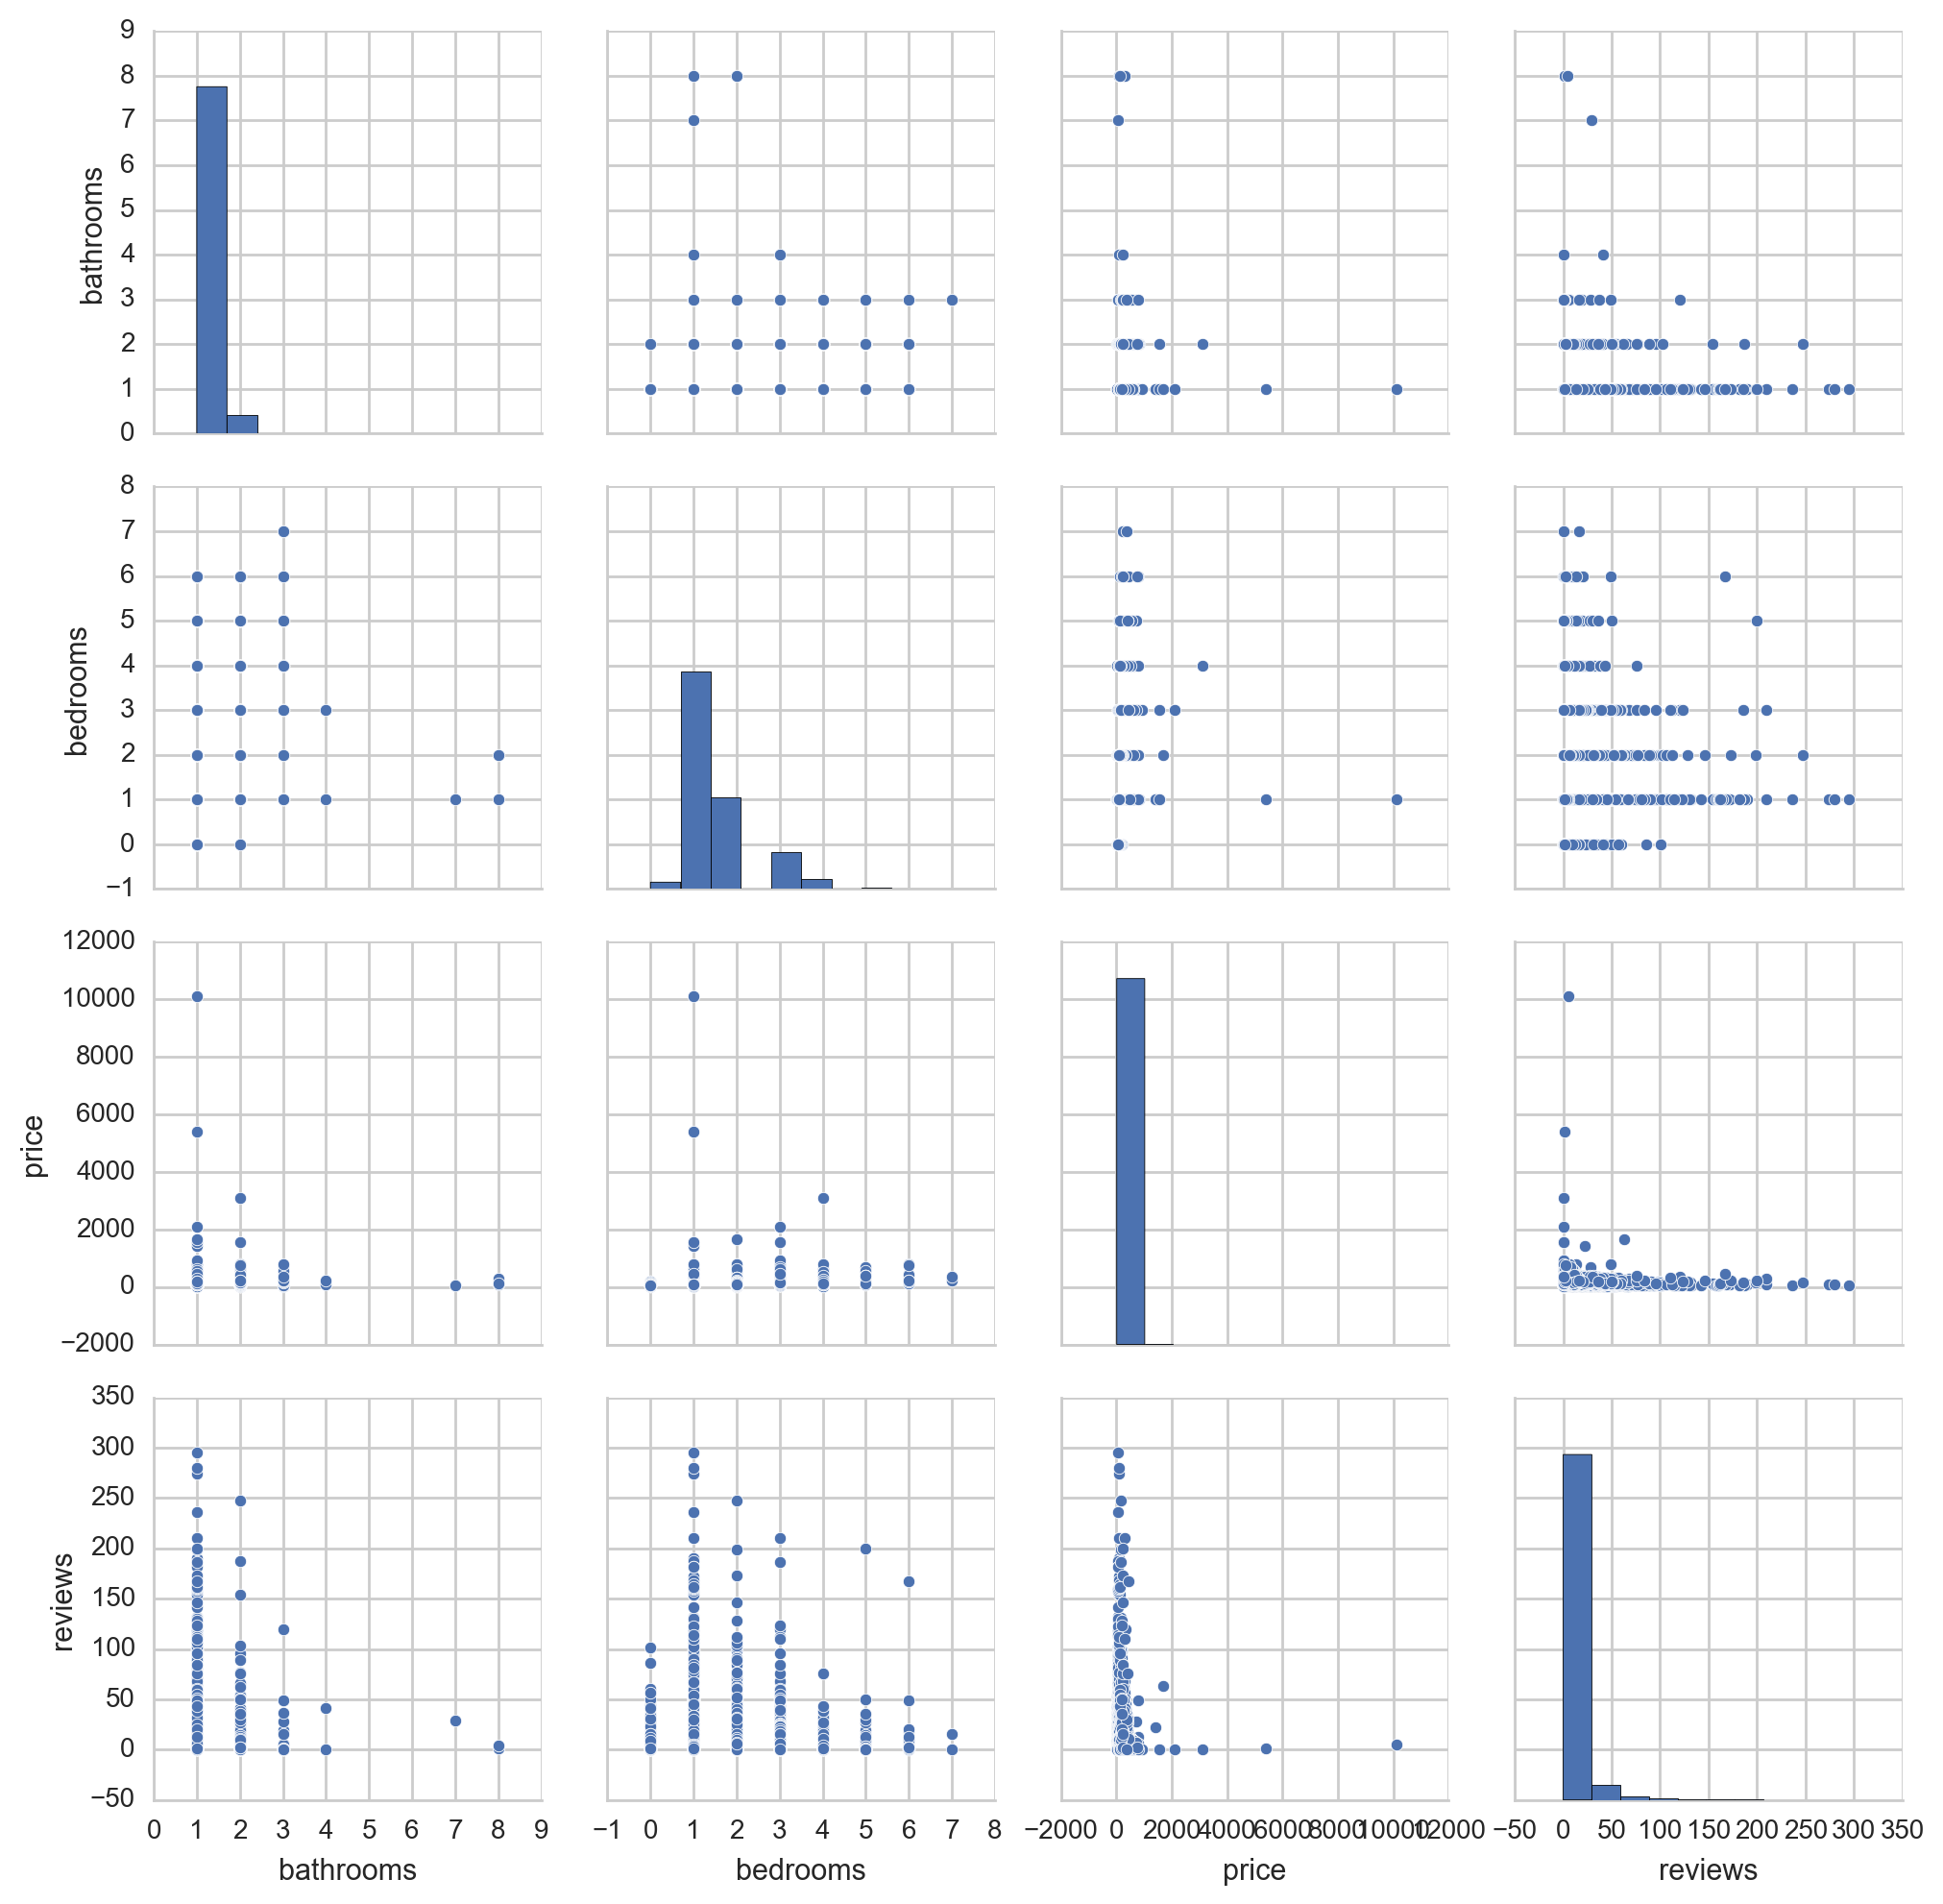

In [192]:
sns.pairplot(cop[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']], hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter',
                 diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None,
                 grid_kws=None)

In [193]:
df4_corr = cop[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']].corr()

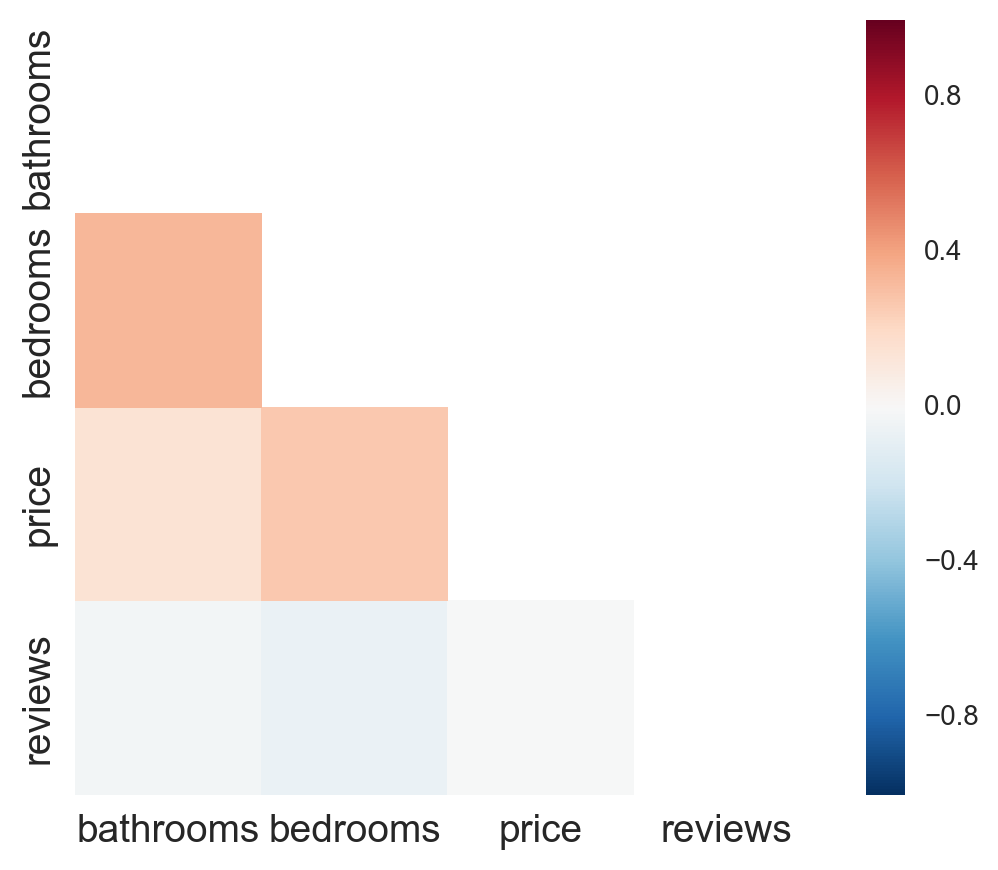

In [194]:
#for heatmap Set the default matplotlib figure size to 7x7:

plt.rcParams['figure.figsize']=(6,5)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df4_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df4_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

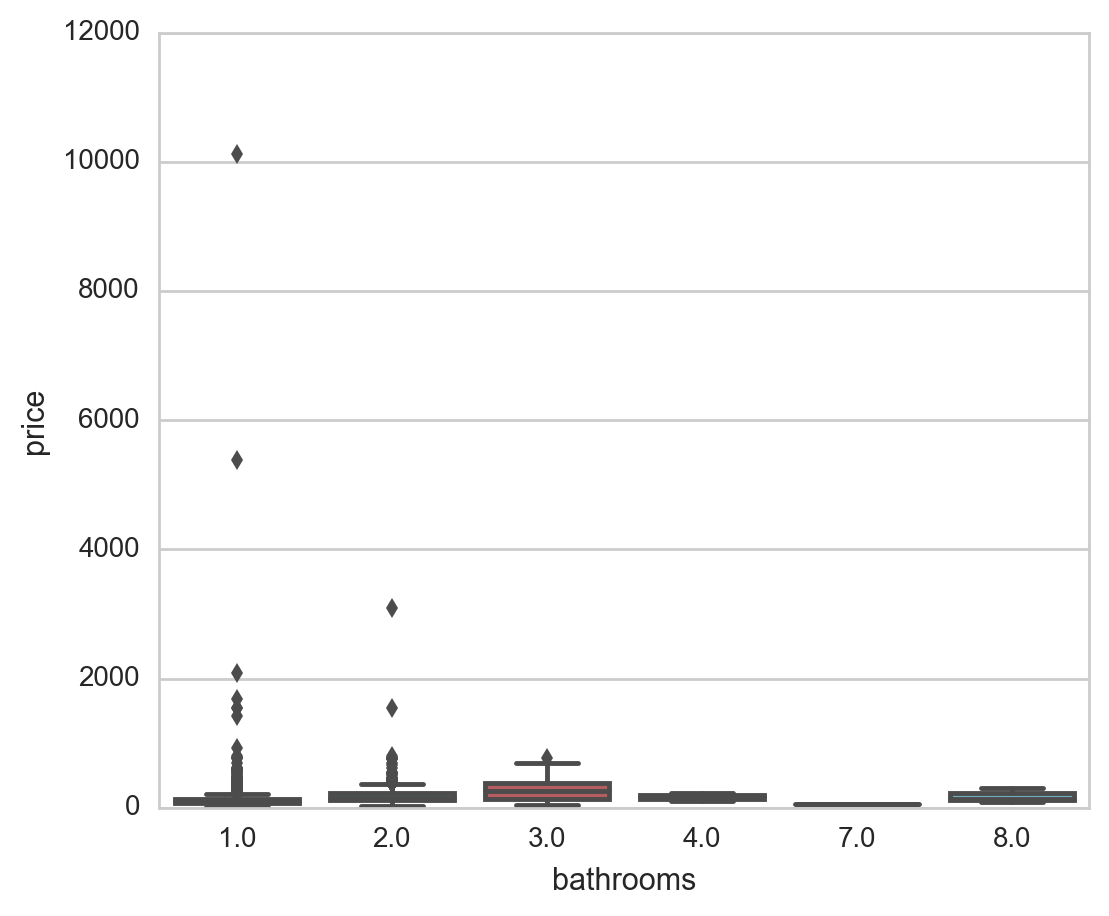

In [195]:
sns.boxplot(x='bathrooms',y='price',data=cop)

In [196]:
cop.index[cop.price == cop.price.max()]

Int64Index([4238], dtype='int64')

In [197]:
cop.ix[4238,:]

level_0                                       8469
room_id                                    7417041
host_id                                   38854927
room_type                          Entire home/apt
neighborhood                              Indre By
reviews                                          5
overall_satisfaction                             4
accommodates                                     4
bedrooms                                         1
bathrooms                                        1
price                                        10118
minstay                                          2
latitude                                    55.682
longitude                                  12.5614
collected               2016-06-04 09:06:38.586967
Name: 4238, dtype: object

In [198]:
cop.drop(cop.index[[4238]],inplace=True)

In [199]:
cop = cop.reset_index()

In [200]:
cop.shape

(14549, 16)

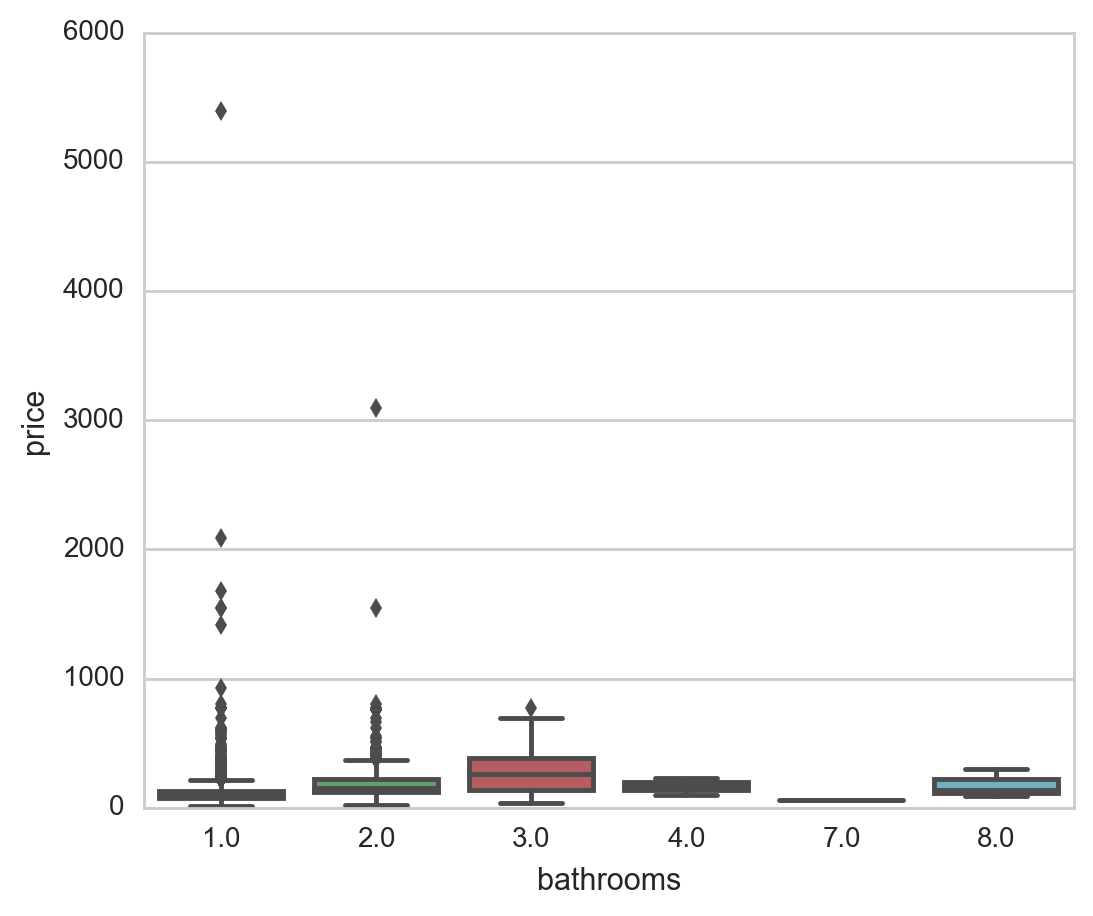

In [201]:
sns.boxplot(x='bathrooms',y='price',data=cop)

In [202]:
cop.index[cop.price > 1000]

Int64Index([326, 1298, 5585, 7418, 11285, 13171, 13803, 14444], dtype='int64')

In [218]:
cop.ix[14444,:]

index                                        14445
level_0                                       5020
room_id                                    5008578
host_id                                   16562253
room_type                          Entire home/apt
neighborhood                              Indre By
reviews                                          0
overall_satisfaction                           NaN
accommodates                                     8
bedrooms                                         4
bathrooms                                        2
price                                         3097
minstay                                          1
latitude                                   55.6851
longitude                                   12.589
collected               2016-06-04 09:12:35.980786
Name: 14444, dtype: object

In [223]:
cop.head()

,index,level_0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,7378,6830322,35781358,Entire home/apt,Osterbro,1,NaN,2,0.0,1.0,39.0,1.0,55.694789,12.569203,2016-06-04 08:52:54.513456
1,1,7930,7096528,37197402,Entire home/apt,Valby,0,NaN,2,0.0,1.0,62.0,1.0,55.671845,12.487983,2016-06-04 08:30:38.003941
2,2,12504,11644260,61746506,Entire home/apt,Osterbro,0,NaN,2,0.0,1.0,77.0,3.0,55.702610,12.581401,2016-06-04 03:39:24.826704
3,3,5416,5467290,15769660,Entire home/apt,Bispebjerg,17,4.5,2,0.0,1.0,62.0,5.0,55.708965,12.535755,2016-06-04 09:10:20.986316
4,4,1953,2025151,287643,Entire home/apt,Vesterbro-Kongens Enghave,0,NaN,2,0.0,1.0,115.0,4.0,55.671005,12.556932,2016-06-04 03:17:58.548958


In [219]:
cop.drop(cop.index[[326, 1298, 5585, 11285, 13171, 13803]],inplace=True)

In [204]:
#cop = cop.reset_index()

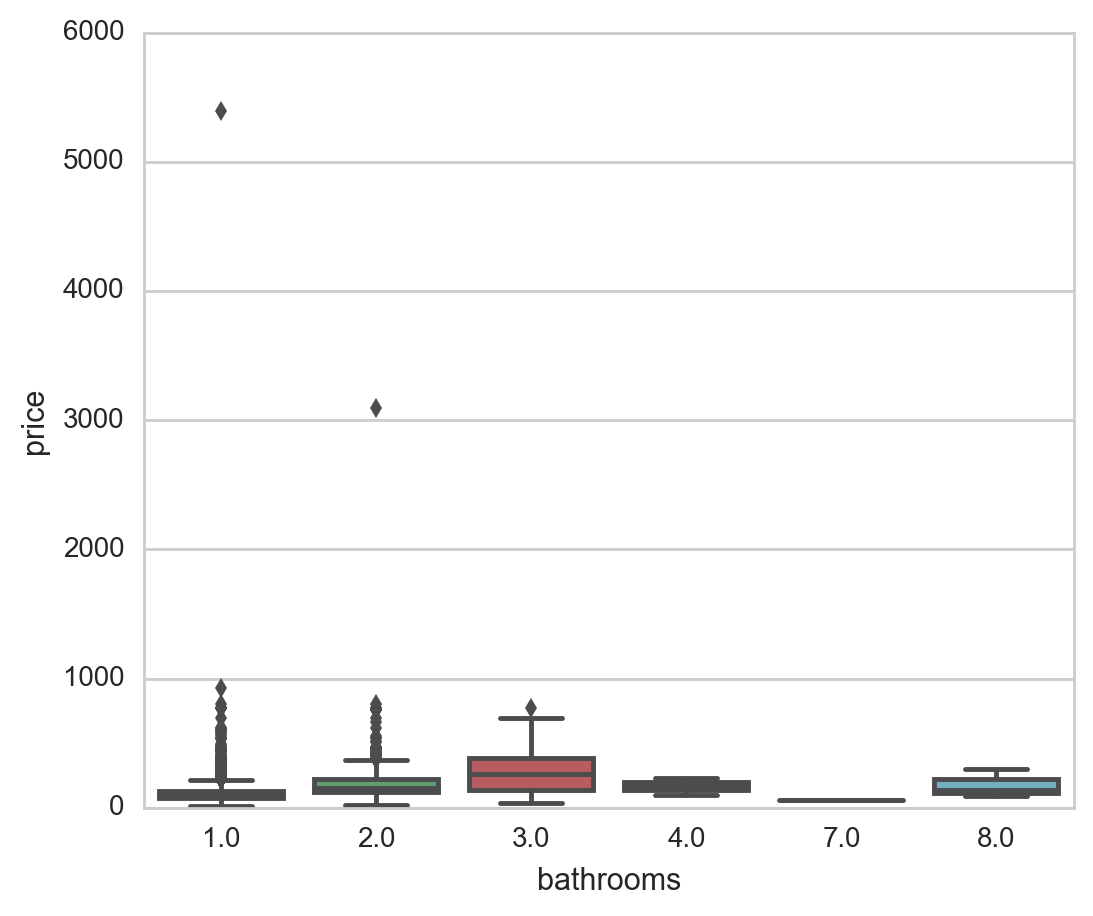

In [221]:
sns.boxplot(x='bathrooms',y='price',data=cop)

In [222]:
cop.index[cop.price > 1000]

Int64Index([7418, 14444], dtype='int64')

In [206]:
#cop.reset_index()

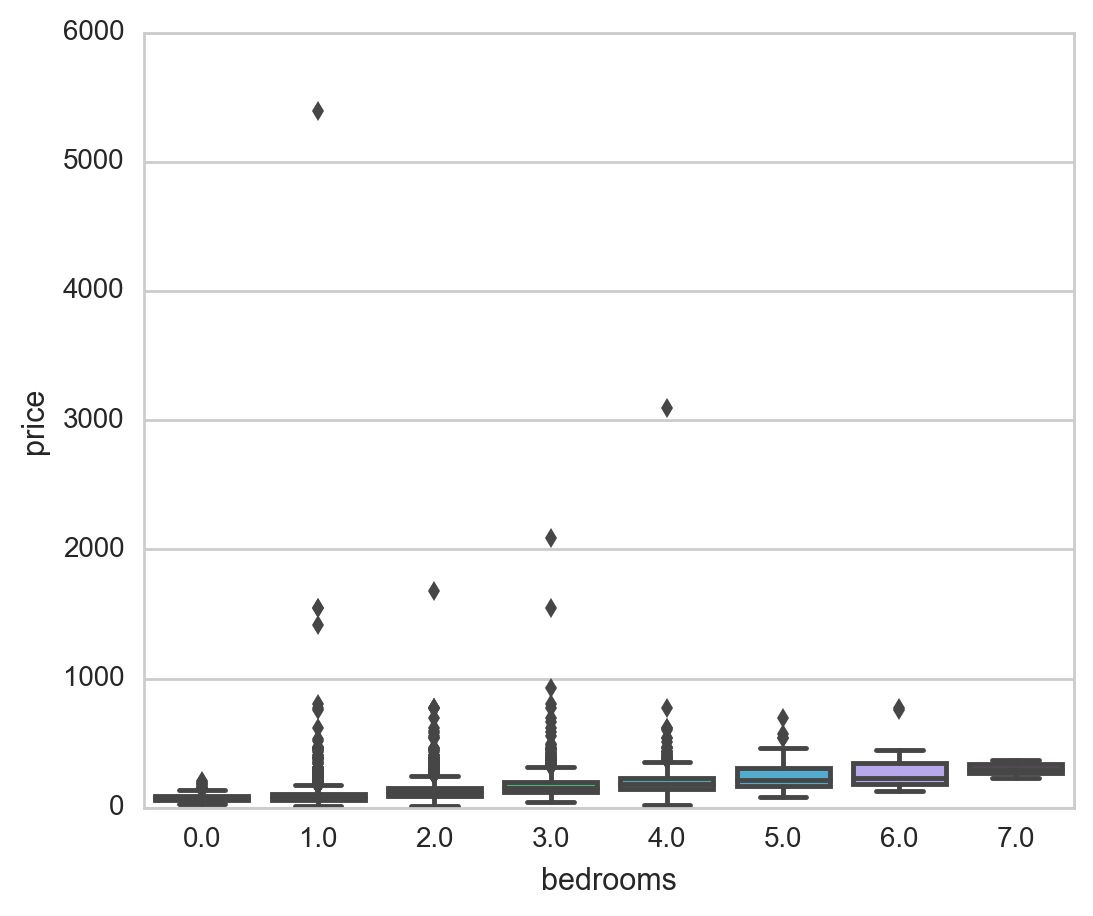

In [207]:
sns.boxplot(x='bedrooms',y='price',data=cop, orient='v',)